In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns; sns.set()

In [2]:
hom_exps = ["hom_relieff", "hom_geode", "hom_gr", "hom_su", "hom_wx"]
sin_exps = ["sin_relieff", "sin_geode", "sin_gr", "sin_su", "sin_wx"]

exps = ["hyb3", "hyb_stbw_borda", "hyb_borda_borda", "het", "het2"] + hom_exps + sin_exps

exp_translation = {
    "het": "Het",
    "hyb3": "Hyb Wx-GR-SU",
    "hyb_stbw_borda": "Hyb Stb",
    "hyb_borda_borda": "Hyb Borda",
    "het2": "Het Wx-GR-SU",
    "hom_geode": "Hom GeoDE",
    "hom_gr": "Hom GR",
    "hom_su": "Hom SU",
    "hom_relieff": "Hom ReliefF",
    "hom_wx": "Hom Wx",
    "sin_relieff": "ReliefF",
    "sin_geode": "GeoDE",
    "sin_gr": "GR",
    "sin_su": "SU",
    "sin_wx": "Wx"
}

In [3]:
def save_plot(y_col, df, title):
    save_path = path + "plots/" + thresholds + "/"
    style.use('fivethirtyeight')
    sns.set_palette("hls", 8)
    p = sns.lineplot(x="Threshold", y=y_col, data=df, 
                     hue="Type", style="Type", dashes=False, markers=False, linewidth=2, sort=False)

    
    plt.title(title)
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    for line in leg.get_lines():
        line.set_linewidth(1.5)
        
    for line in p.get_lines():
        if line.get_label() == '_line0':
            line.set_linewidth(4.0)
            line.set_zorder(10)
            
    p.get_legend().get_texts()[1].get_fontproperties().set_size(13)
            
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(save_path+title+"_"+y_col, bbox_inches = "tight")
    return


def save_boxplot(y_col, df, title):
    
    order = df.groupby(by=["Type"])[y_col].mean().sort_values(ascending=False).index
    
    save_path = path + "plots/boxplots_" + thresholds + "/"
    style.use('fivethirtyeight')
    sns.set_palette("hls", 8)
    p = sns.boxplot(x="Type", y=y_col, data=df, order=order,
                     hue="Type", dodge=False, linewidth=0.5)
    
    p.set(xticklabels=[])
    p.set(xlabel=None)

    plt.title(title)
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            
    p.get_legend().get_texts()[1].get_fontproperties().set_size(13)
            
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(save_path+title+"_"+y_col, bbox_inches = "tight")
    return

In [4]:
renamed_cols= {
    'th_int': 'Threshold',
    'stabilities': 'Stability',
    'mean_ACC': 'Accuracy',
    'mean_ROC_AUC': 'ROC AUC',
    'mean_PR_AUC': 'PR AUC'
}


hy_hom_items = [
    "Hyb Wx-GR-SU", "Hyb Stb", "Hyb Borda", "Hom GeoDE", "Hom GR", 
    "Hom SU", "Hom ReliefF", "Hom Wx"
]

hy_sin_items = [
    "Hyb Wx-GR-SU", "Hyb Stb", "Hyb Borda", "GeoDE", "GR", 
    "SU", "ReliefF", "Wx"
]

hy_het_items = ['Het', 'Het Wx-GR-SU', 'Hyb Wx-GR-SU', 'Hyb Stb', 'Hyb Borda']

def add_experiment(experiment, results):
    df = pd.read_csv(path+experiment+"/final_results.csv", index_col=0)
    df['Type'] = [exp_translation[experiment] for i in range(len(df))]
    results[experiment] = df
    return 


def load_results(path):
    results = {}
    for e in exps:
        add_experiment(e, results)
    
    concat_df = pd.concat(list(results.values()))
    concat_df = concat_df.rename(columns=renamed_cols, index={'ONE': 'one'})
    concat_df['Trade-off'] = concat_df['Stability'] + 2*concat_df['Accuracy']
    
    if thresholds == "1_100":
        concat_df = concat_df[concat_df.Threshold != 150]
        concat_df = concat_df[concat_df.Threshold != 200]
        concat_df = concat_df[concat_df.Threshold != 500]
    return concat_df

In [5]:
def plot_results_for_vs(df, title):
    
    metrics = ["Accuracy", "ROC AUC", "PR AUC", "Stability", "Trade-off"]
    
    for metric in metrics:
        save_plot(metric, df, title)
        save_boxplot(metric, df, title)
    return
    

def plot_results(vs_exp):
    
    if vs_exp == "hy_hom":
        df = concat_df.loc[concat_df['Type'].isin(hy_hom_items)]
        title = "Hybrid vs Homogeneous"
        
    elif vs_exp == "hy_het":
        df = concat_df.loc[concat_df['Type'].isin(hy_het_items)]
        title = "Hybrid vs Heterogeneous"
        
    elif vs_exp == "hy_sin":
        df = concat_df.loc[concat_df['Type'].isin(hy_sin_items)]
        title = "Hybrid vs SingleFS"
        
    plot_results_for_vs(df, title)
    return


def plot_results_vs(vs_exps):
    for vs_exp in vs_exps:
        plot_results(vs_exp)
    return

## Breast

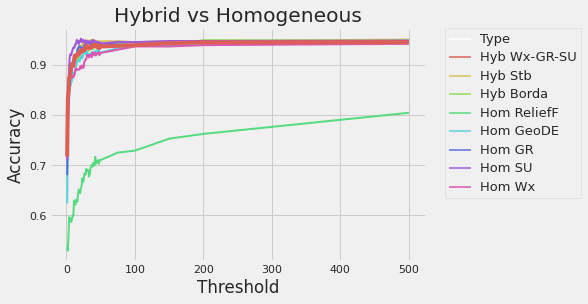

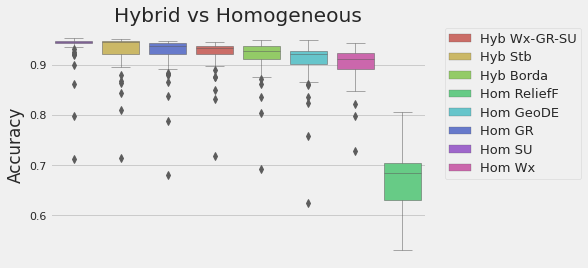

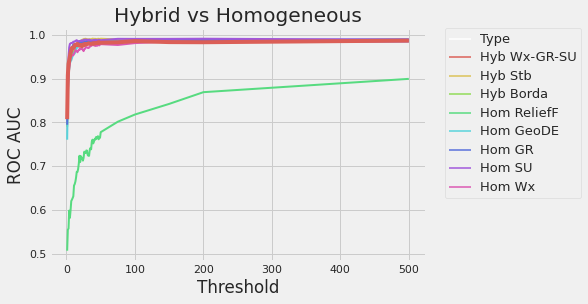

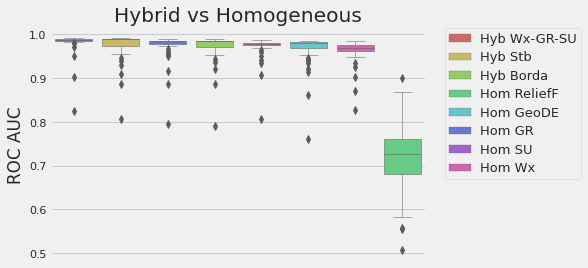

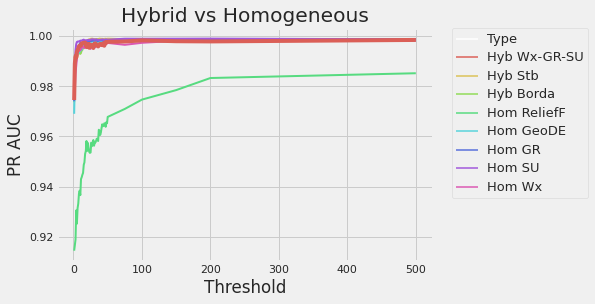

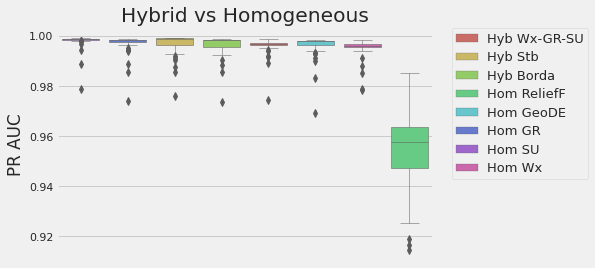

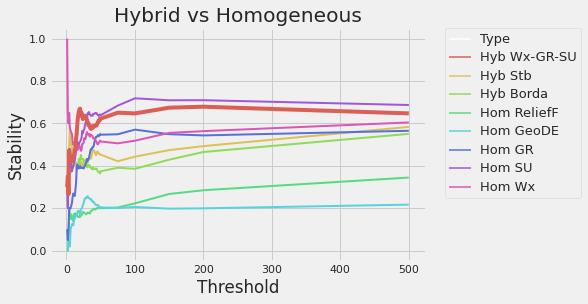

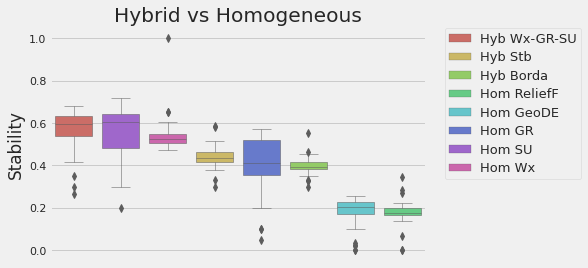

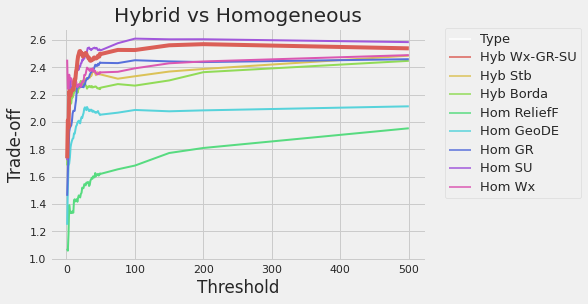

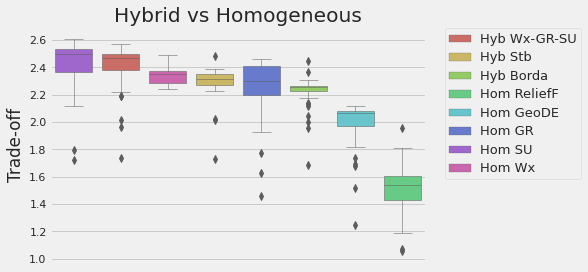

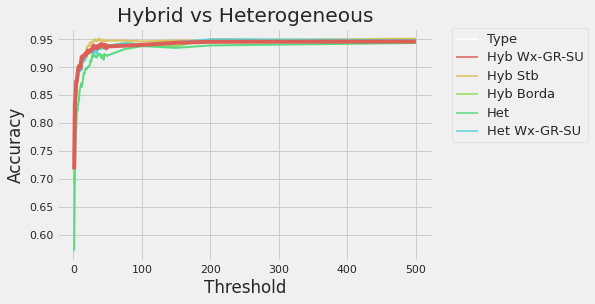

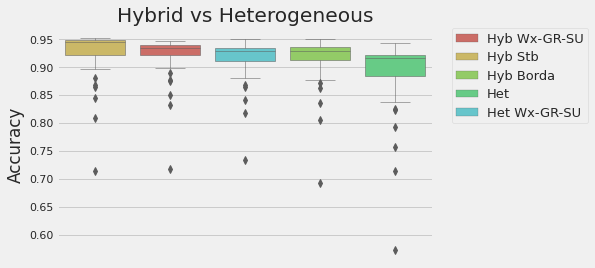

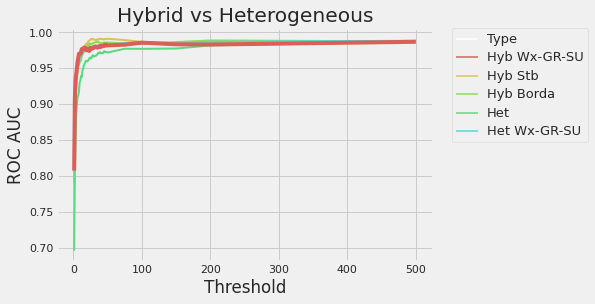

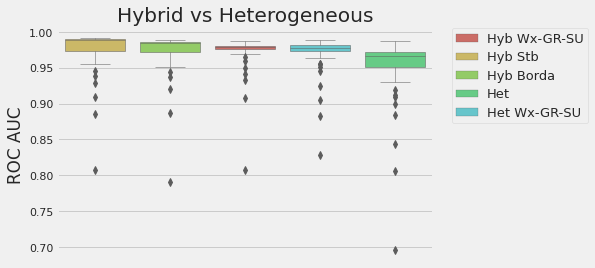

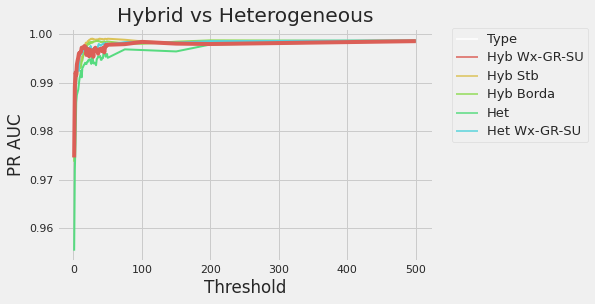

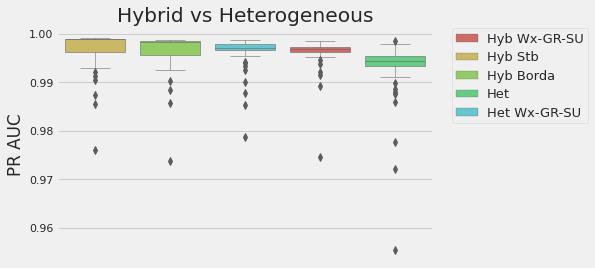

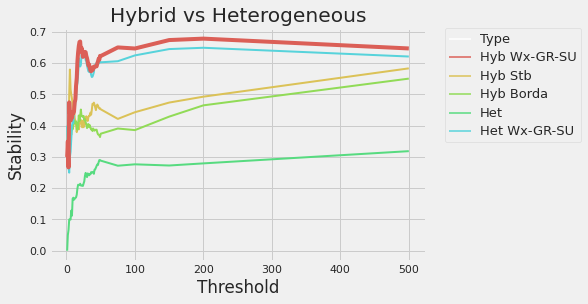

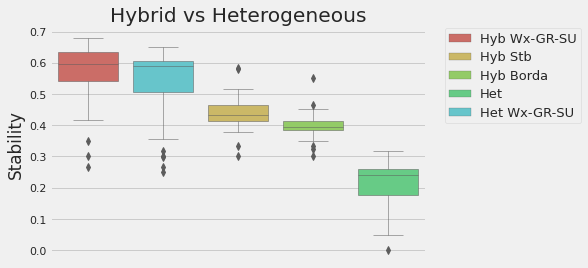

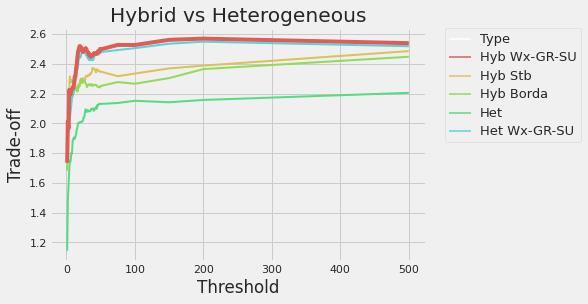

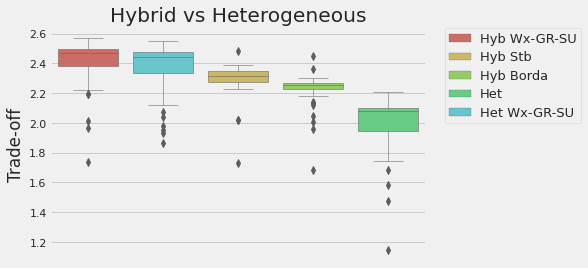

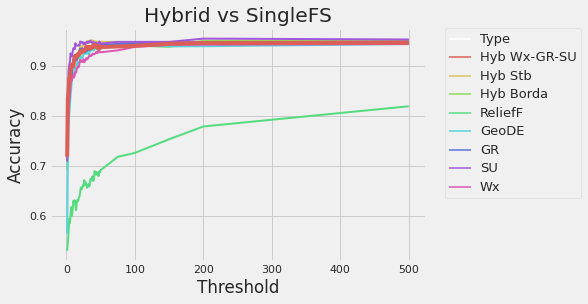

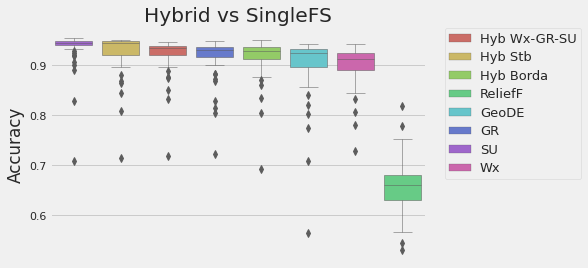

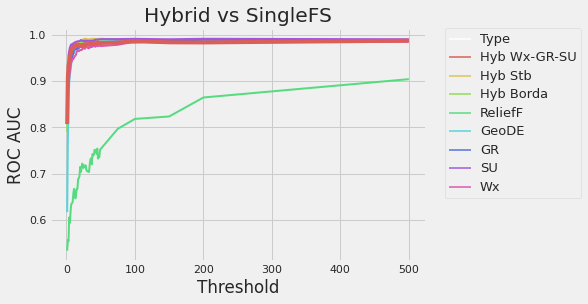

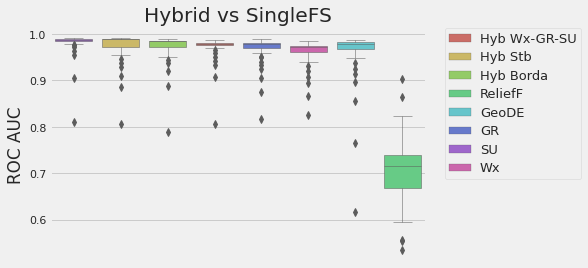

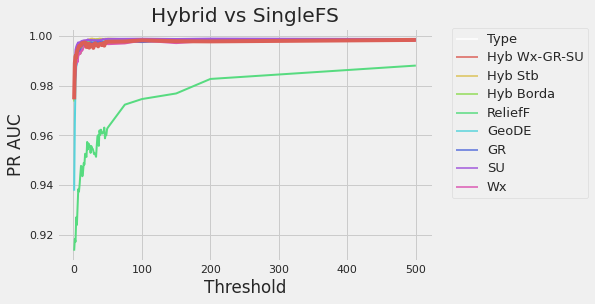

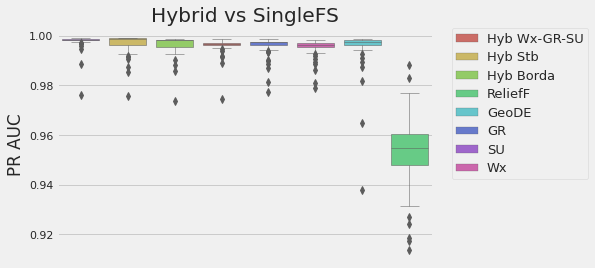

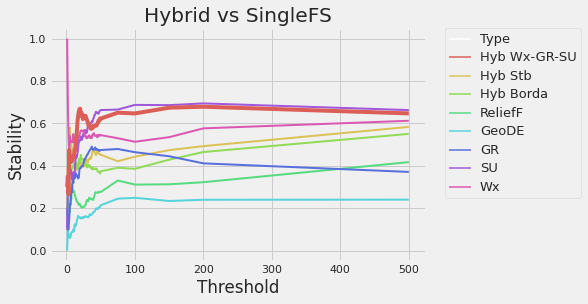

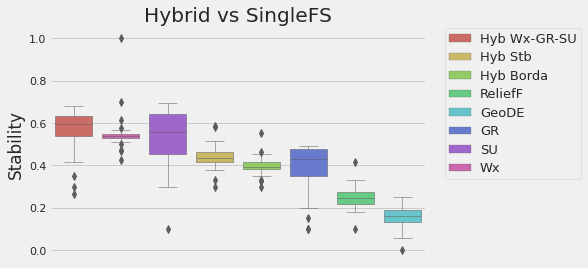

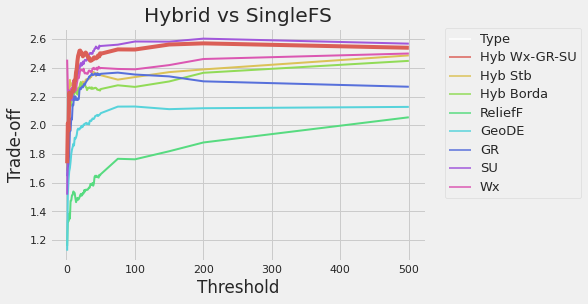

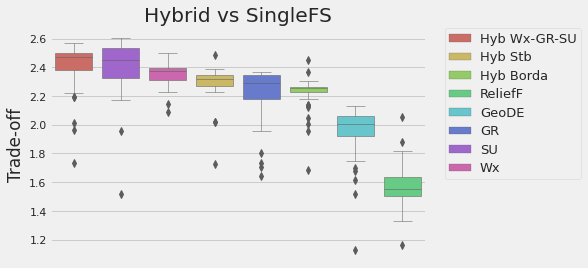

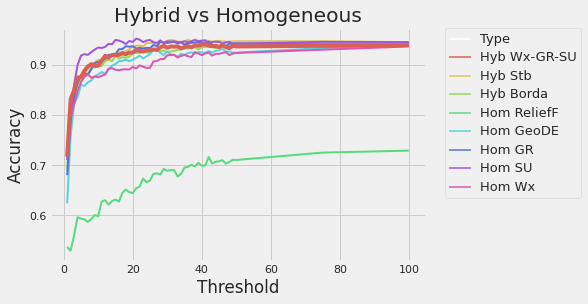

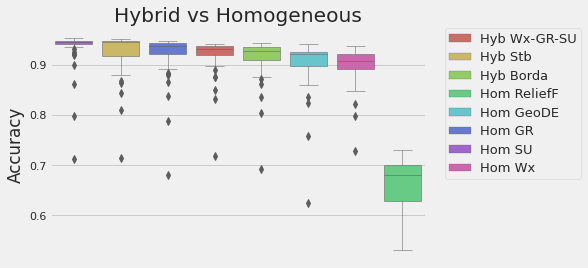

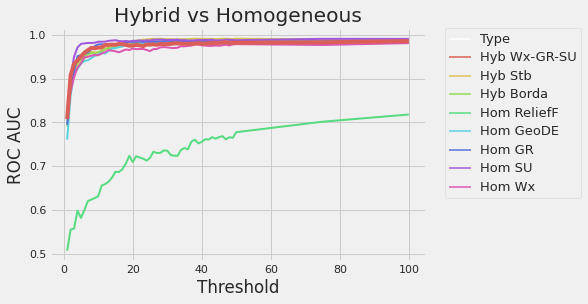

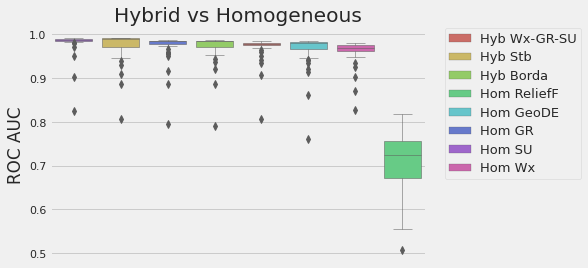

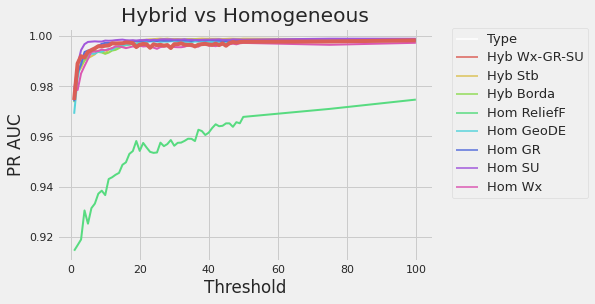

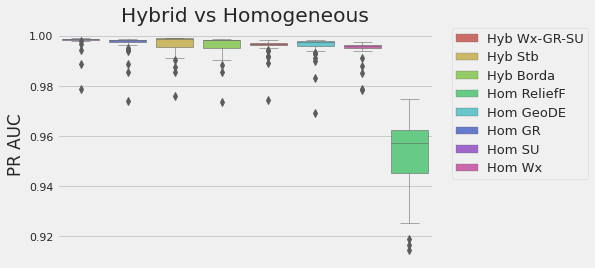

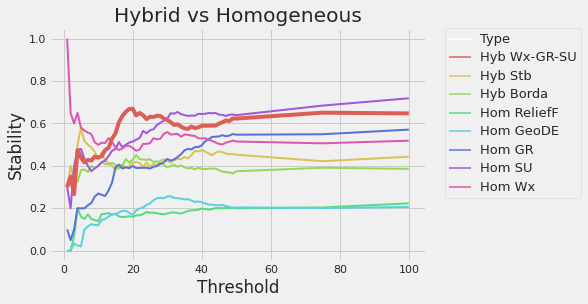

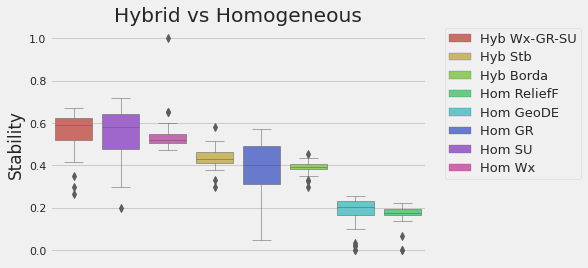

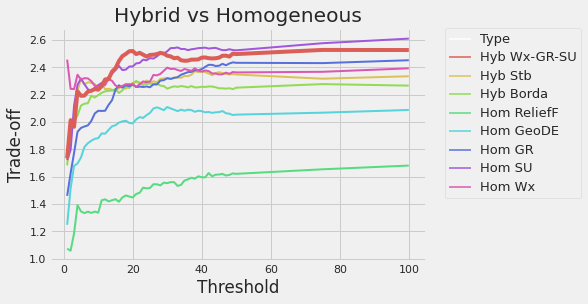

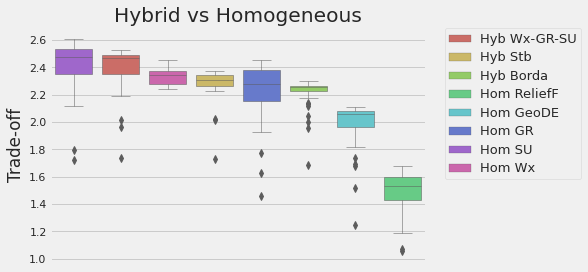

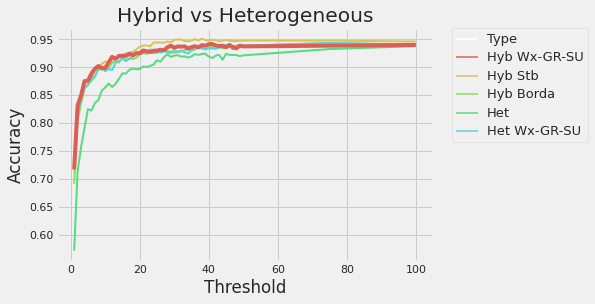

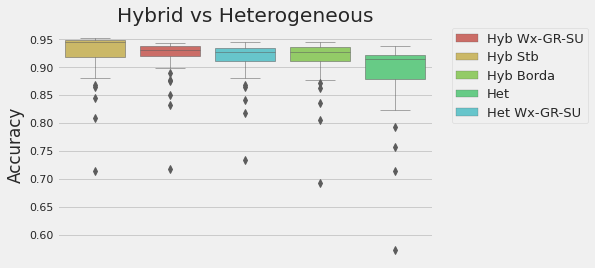

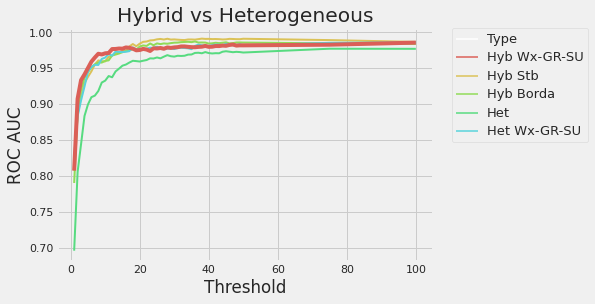

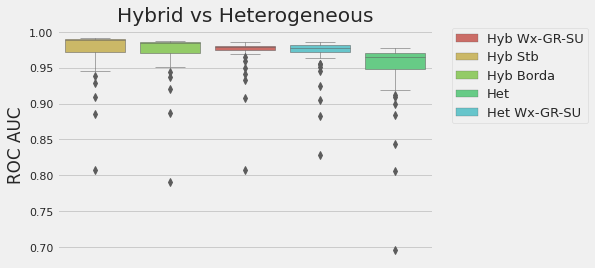

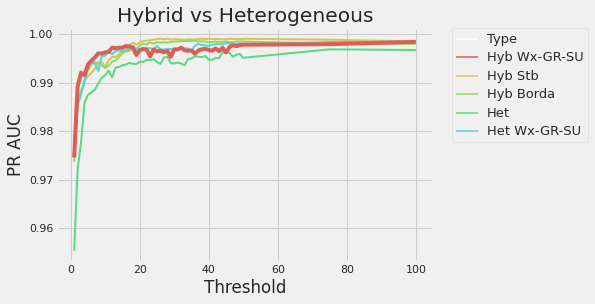

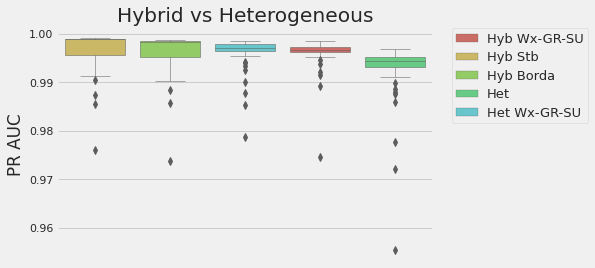

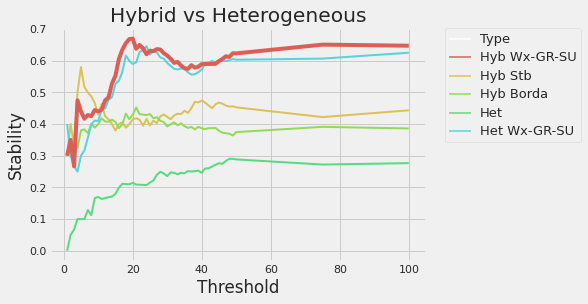

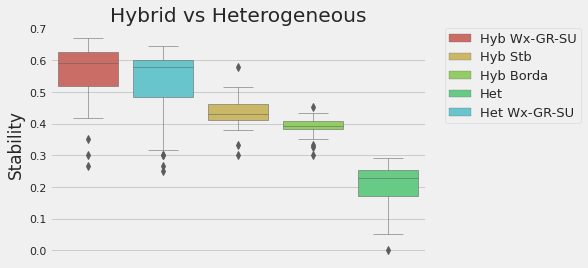

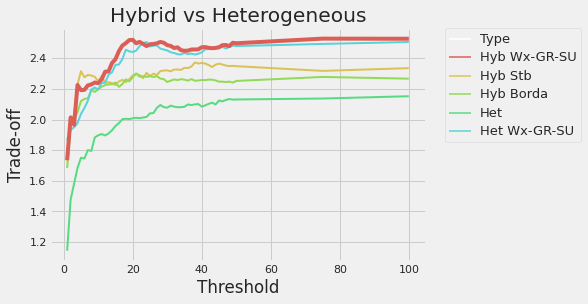

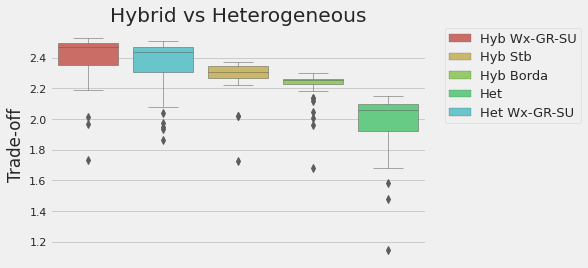

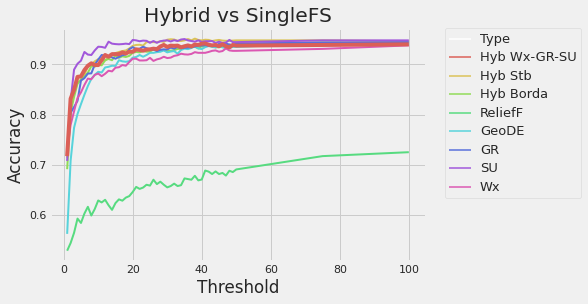

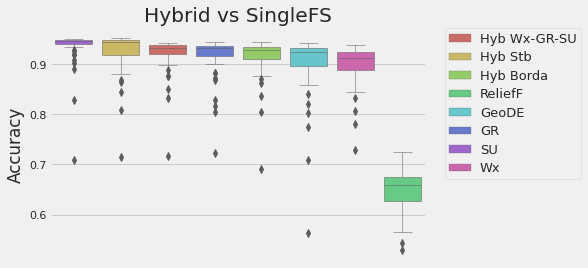

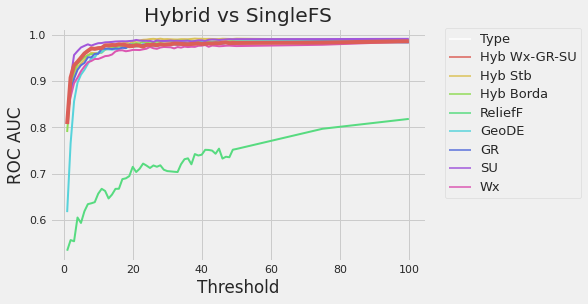

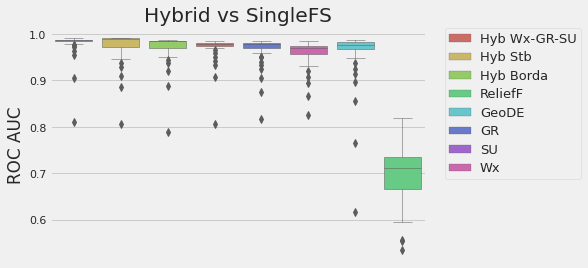

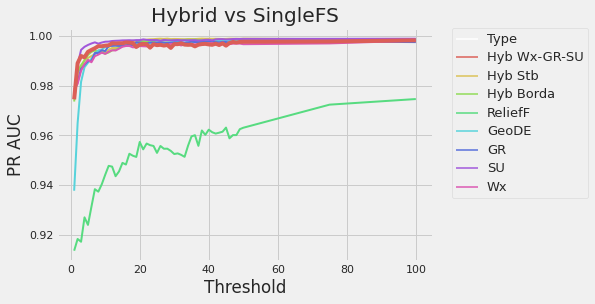

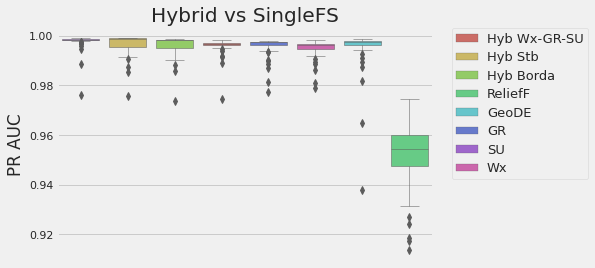

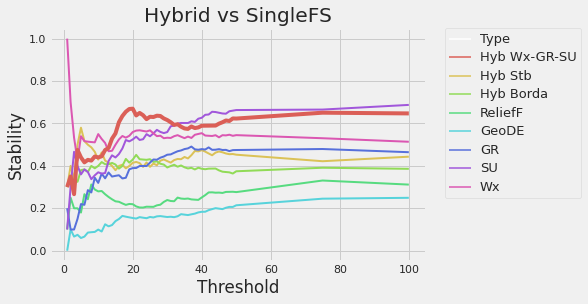

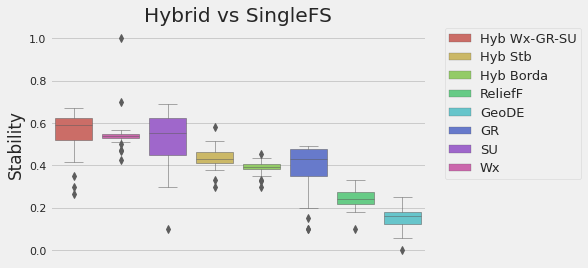

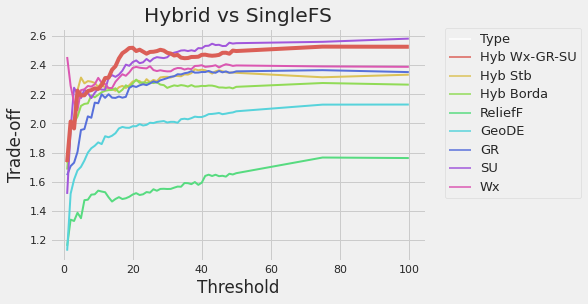

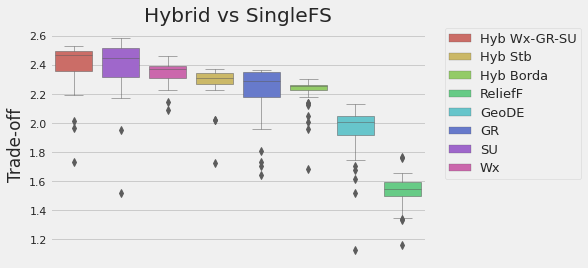

<Figure size 432x288 with 0 Axes>

In [6]:
path = "/home/colombelli/Documents/arrayexpress/breast/"
thresholds_list = ["1_500", "1_100"]
for thresholds in thresholds_list:    
    concat_df = load_results(path)
    plot_results_vs(["hy_hom", "hy_het", "hy_sin"])

## Liver

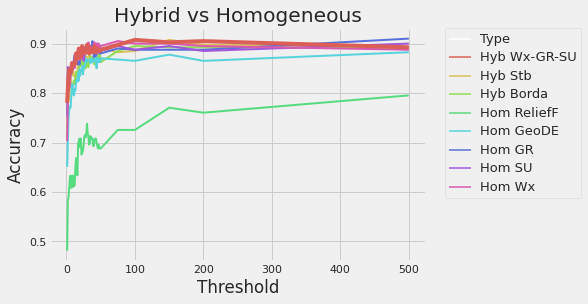

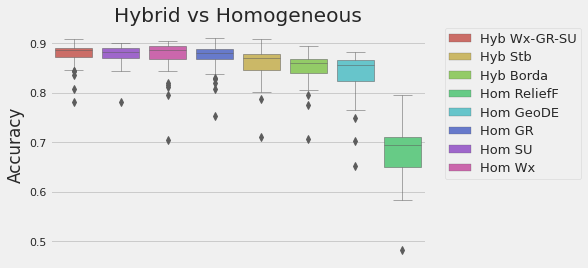

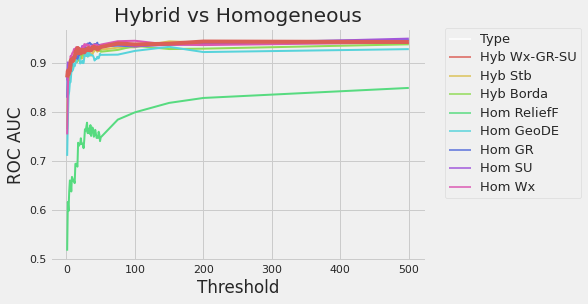

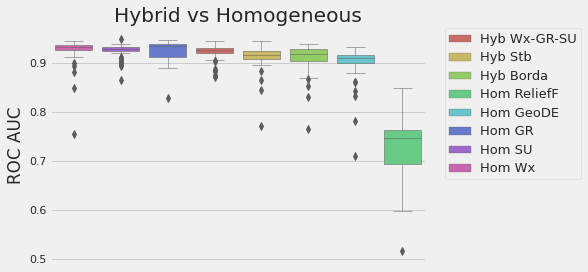

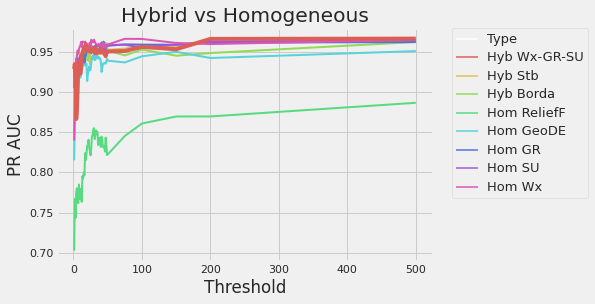

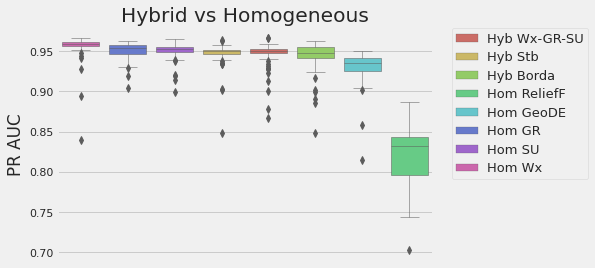

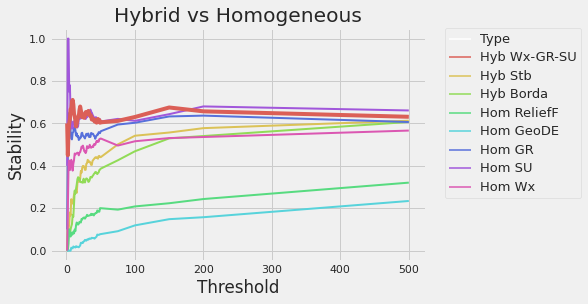

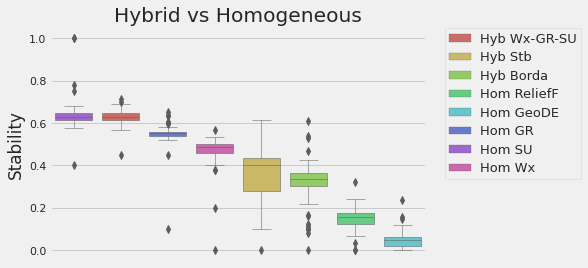

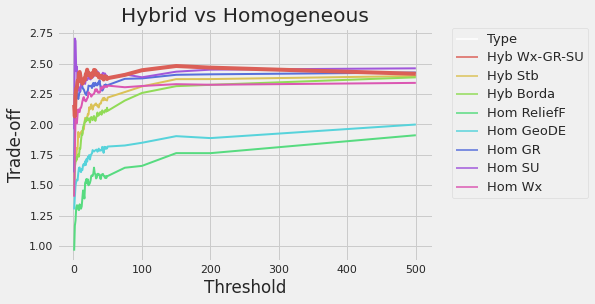

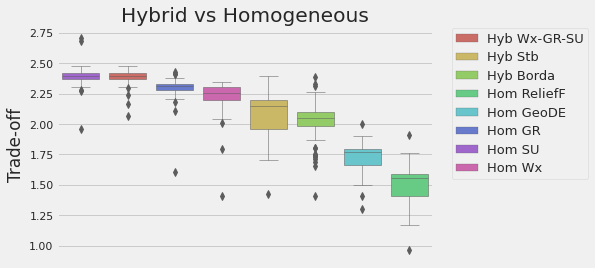

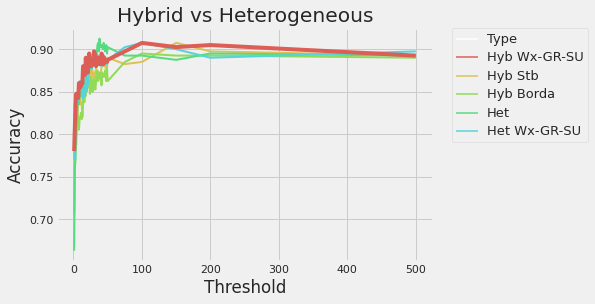

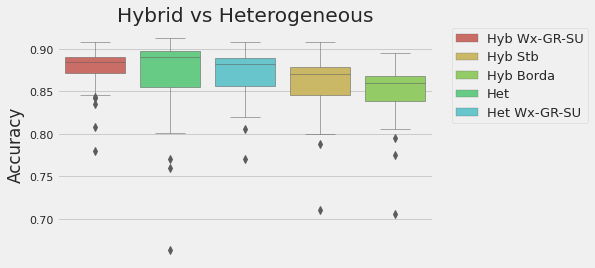

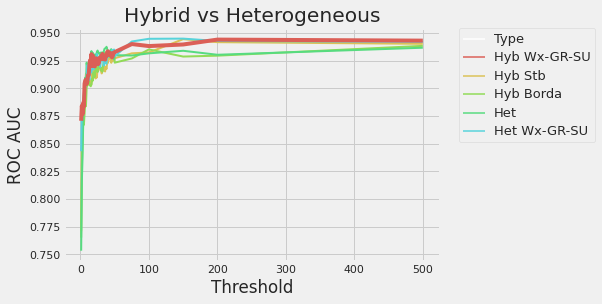

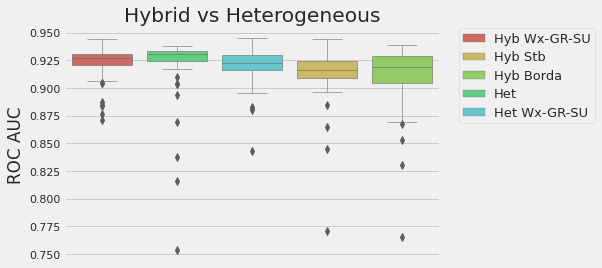

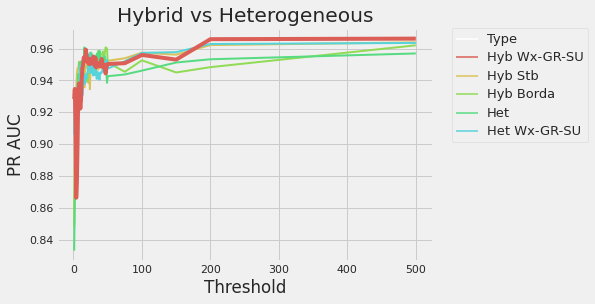

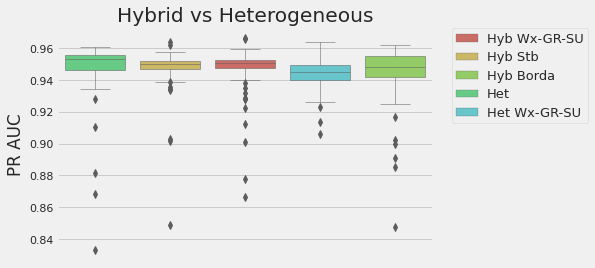

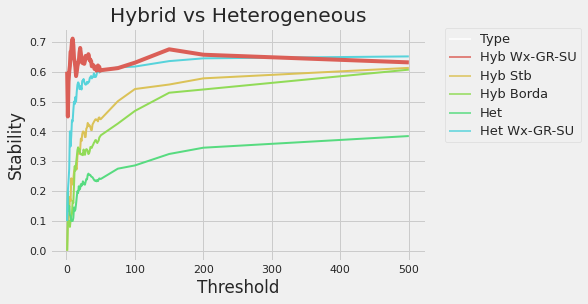

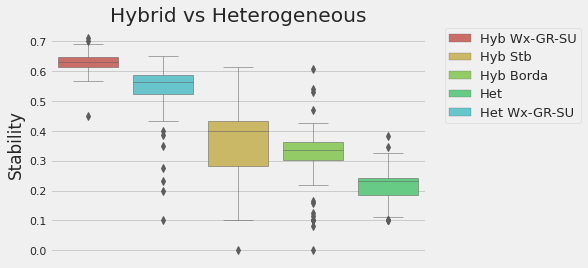

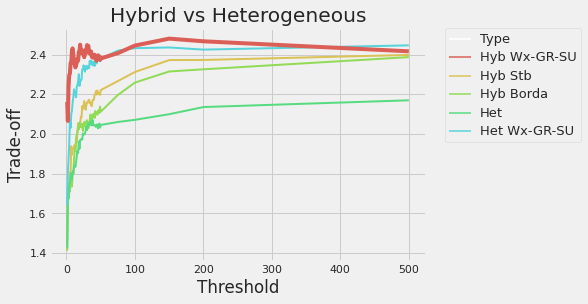

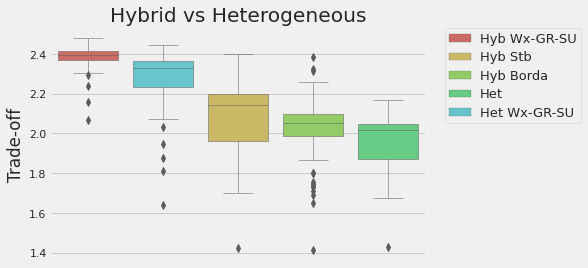

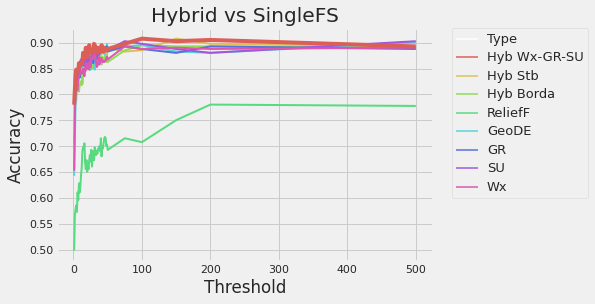

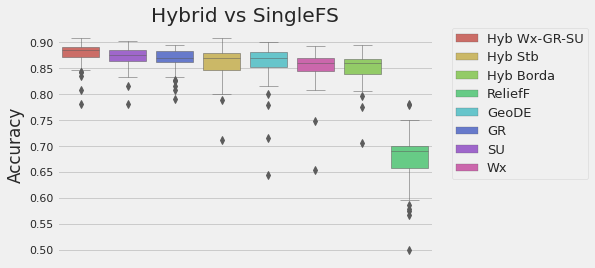

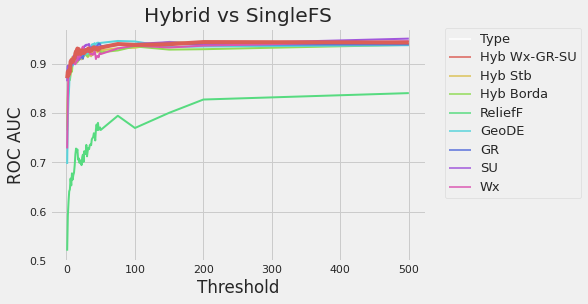

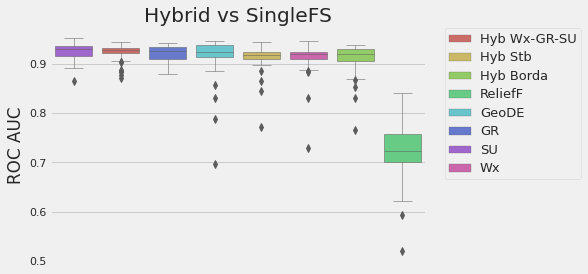

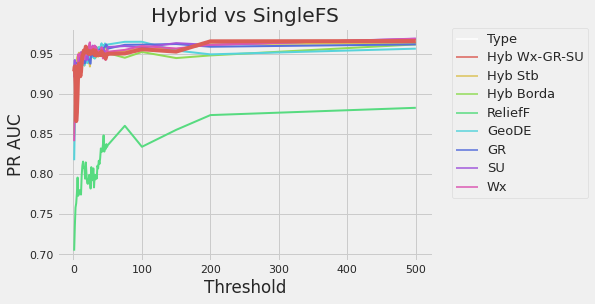

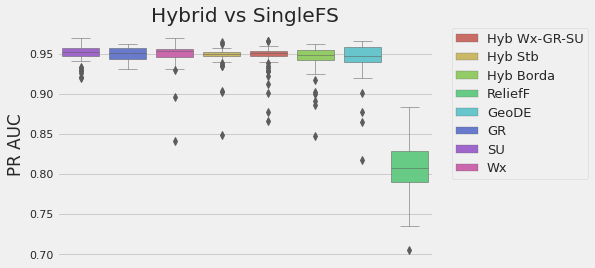

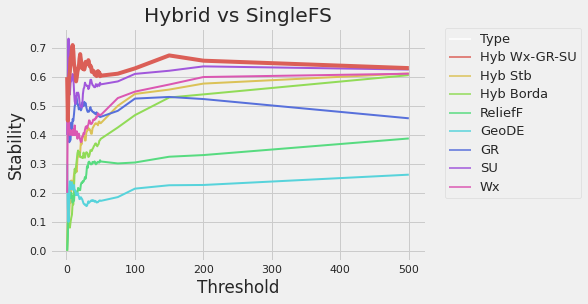

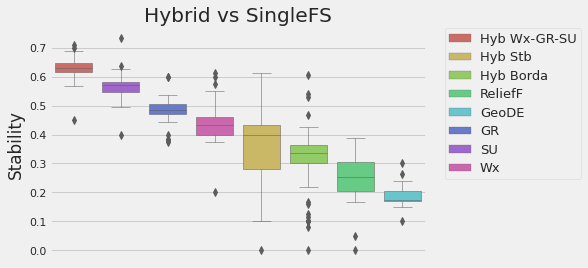

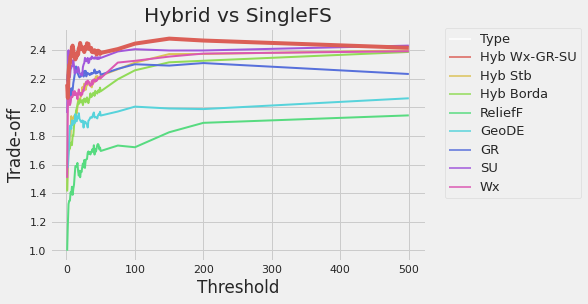

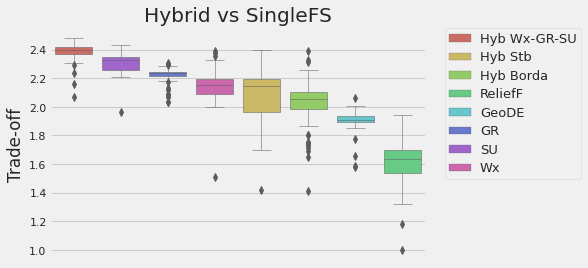

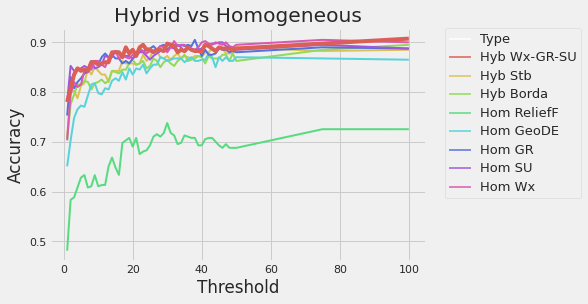

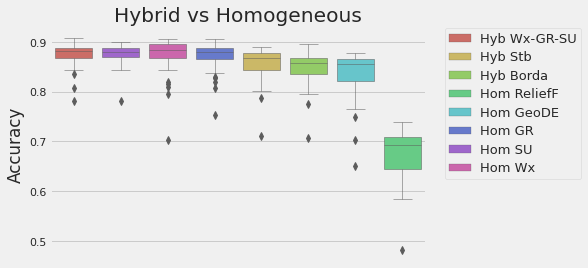

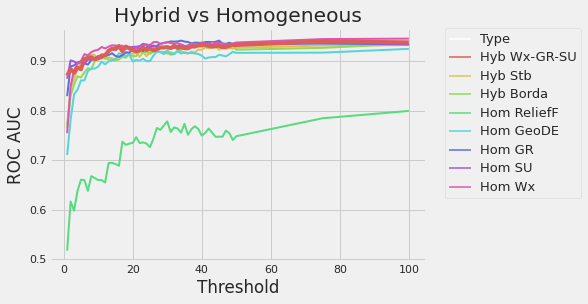

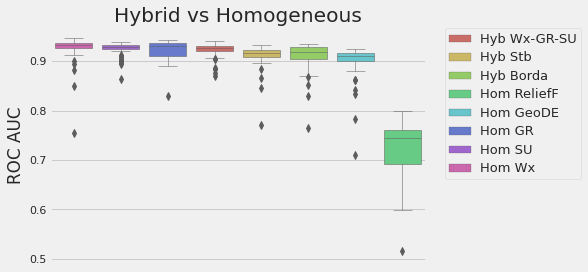

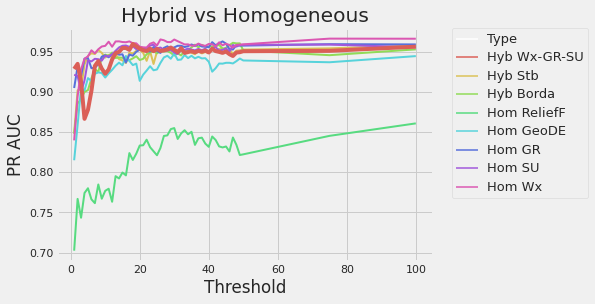

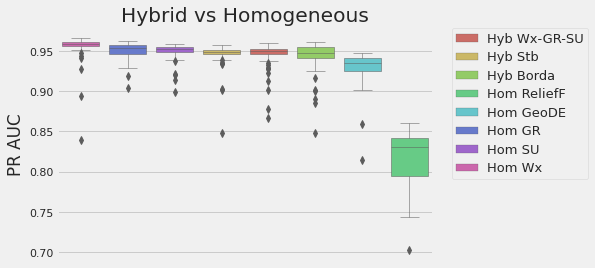

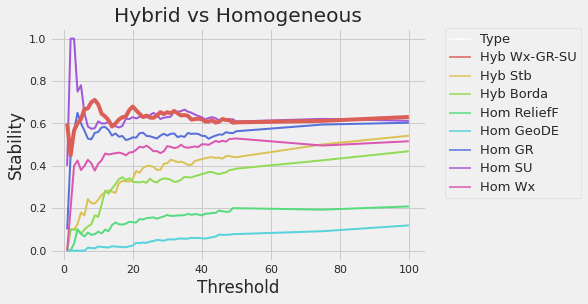

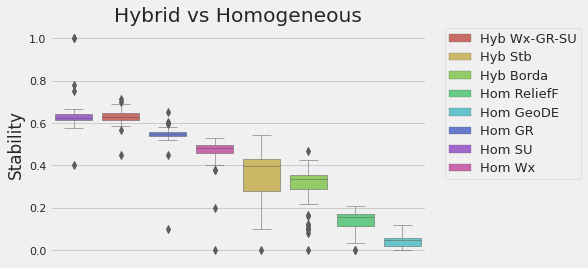

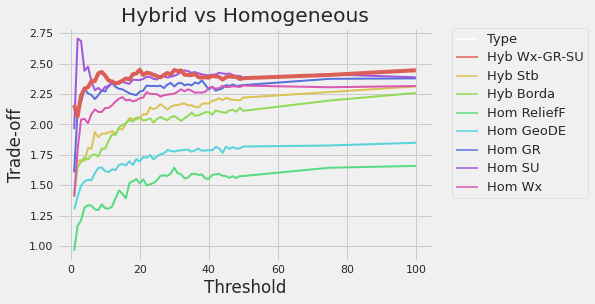

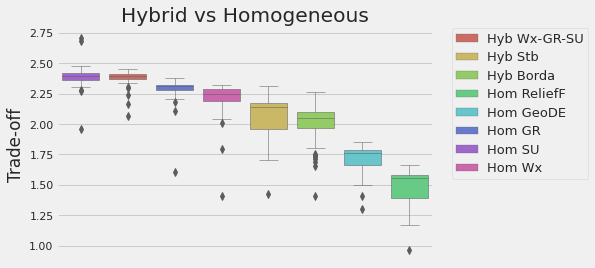

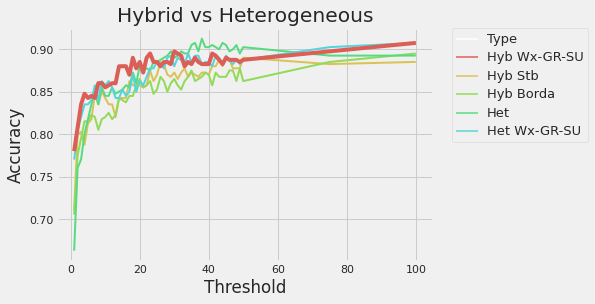

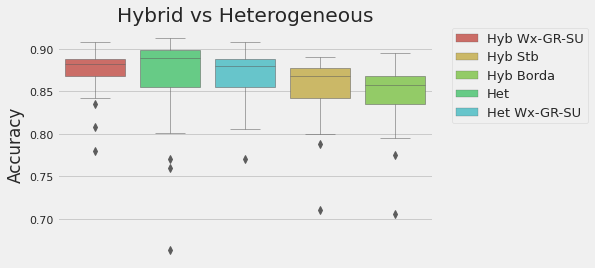

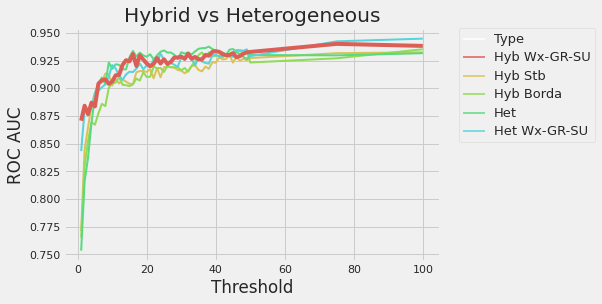

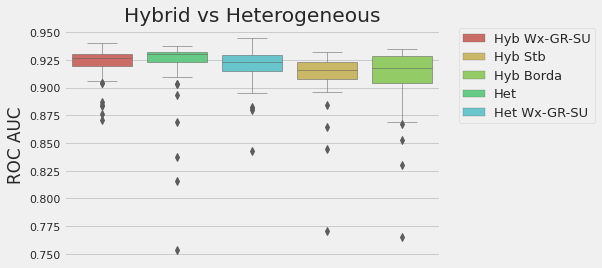

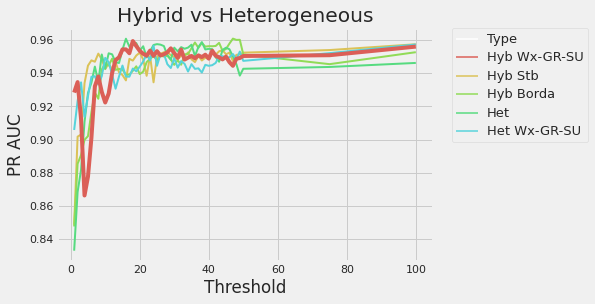

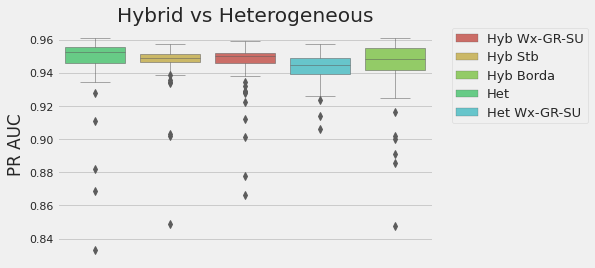

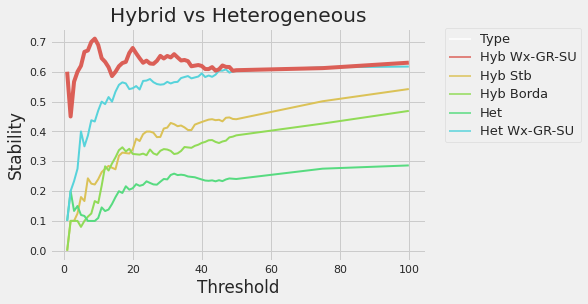

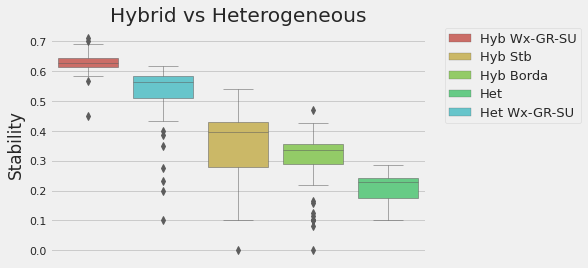

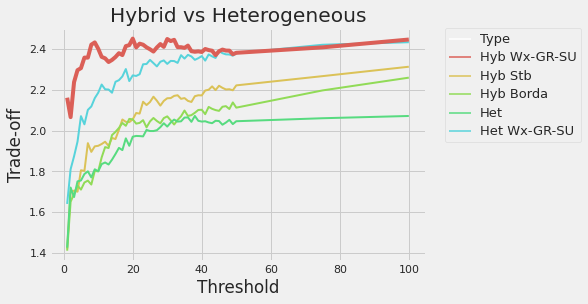

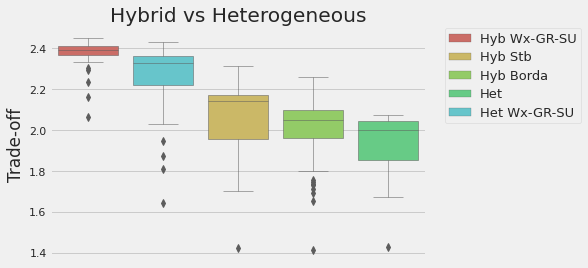

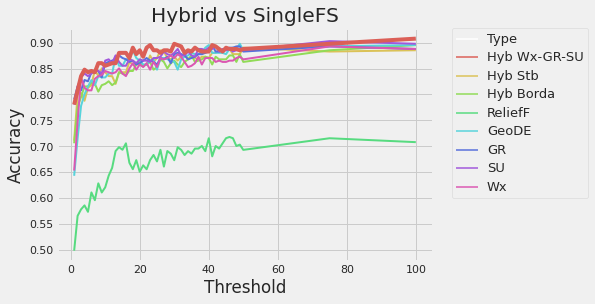

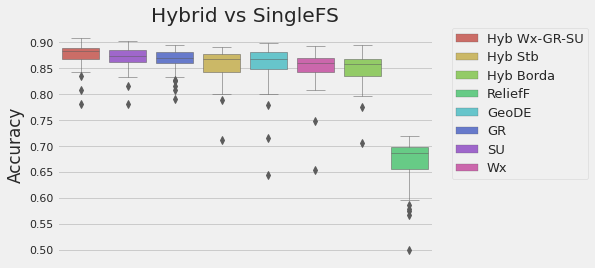

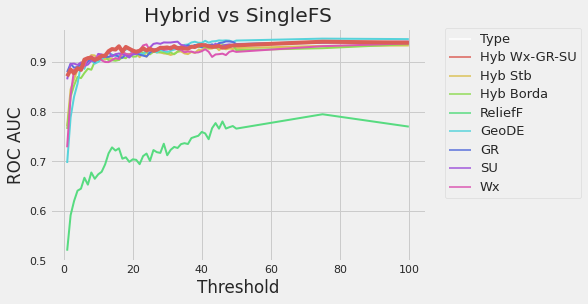

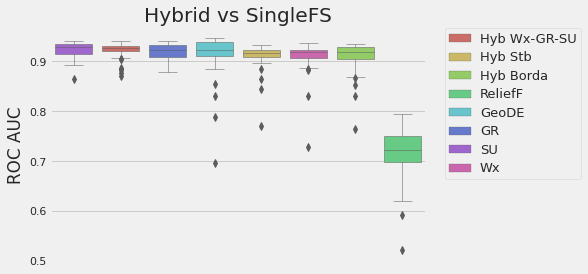

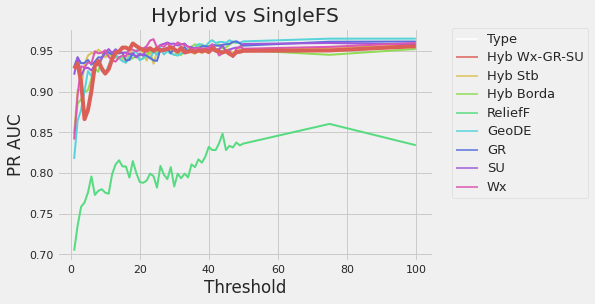

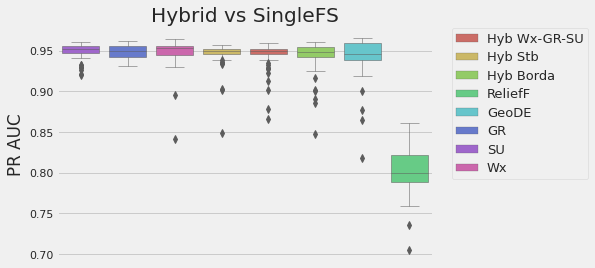

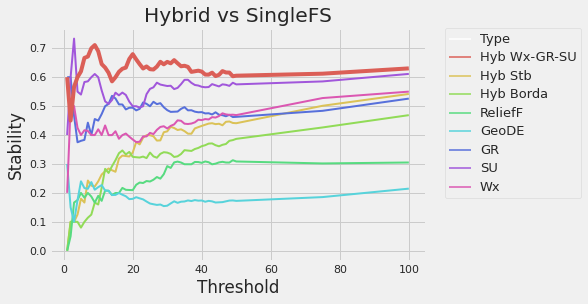

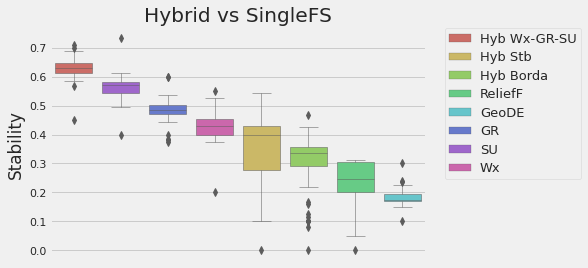

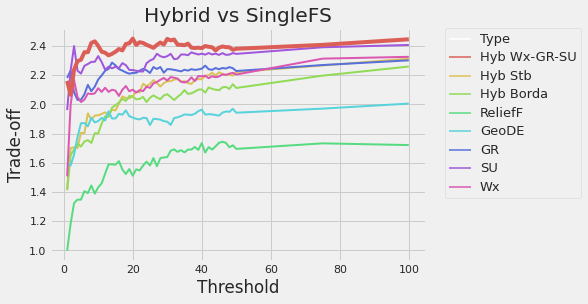

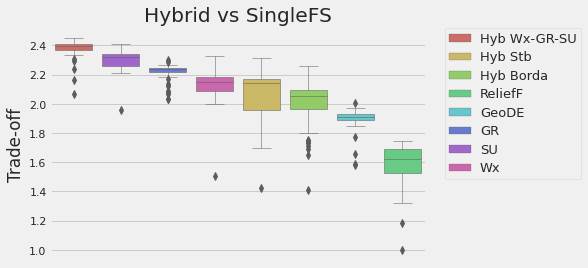

<Figure size 432x288 with 0 Axes>

In [7]:
path = "/home/colombelli/Documents/arrayexpress/liver/"
thresholds_list = ["1_500", "1_100"]
for thresholds in thresholds_list:    
    concat_df = load_results(path)
    plot_results_vs(["hy_hom", "hy_het", "hy_sin"])

## Lung

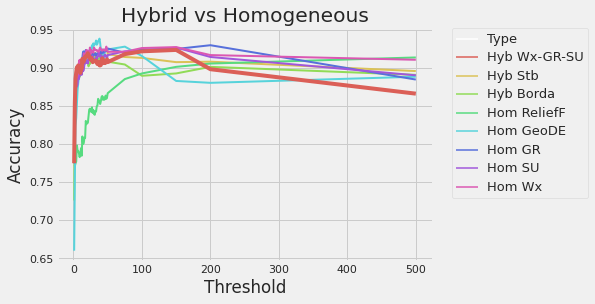

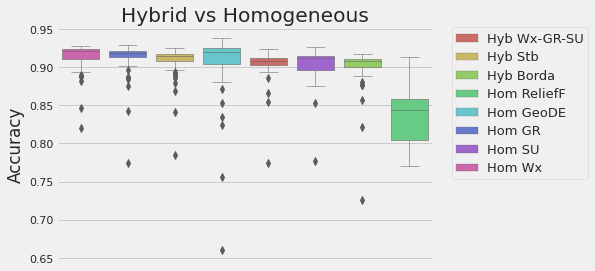

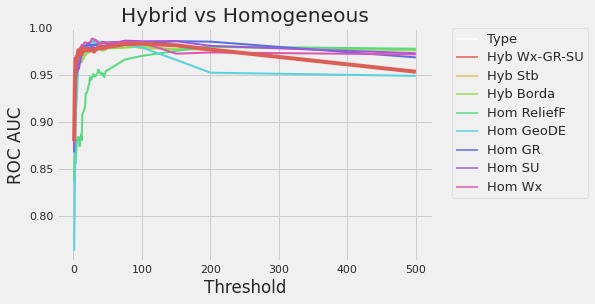

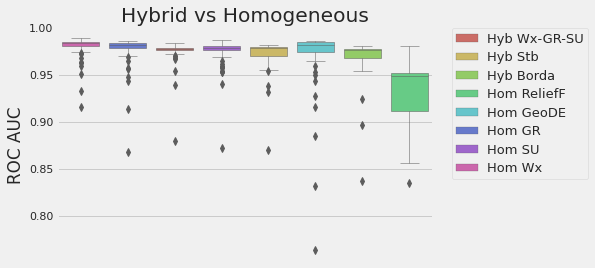

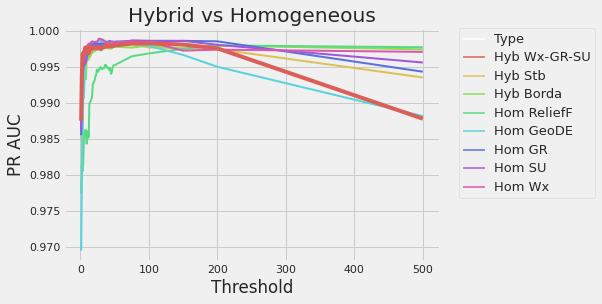

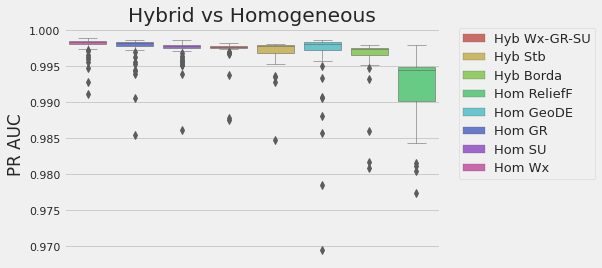

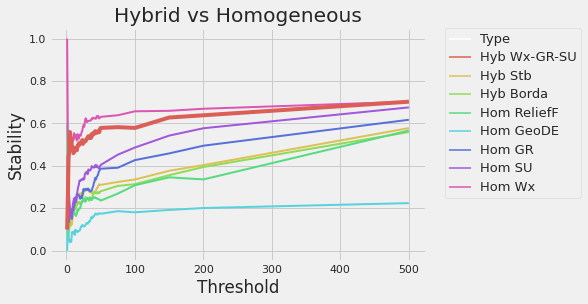

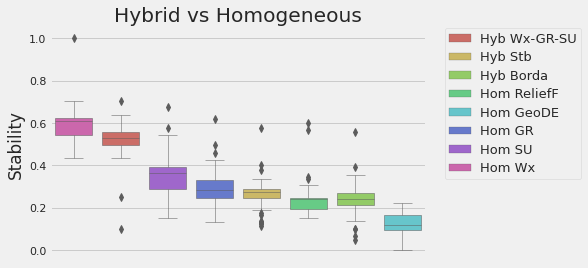

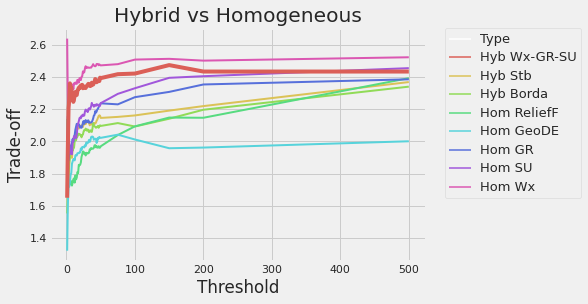

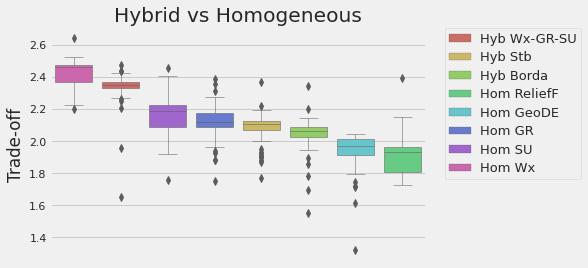

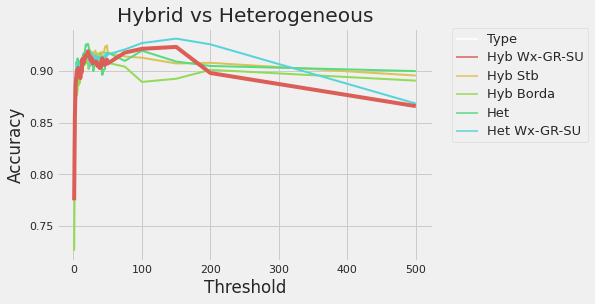

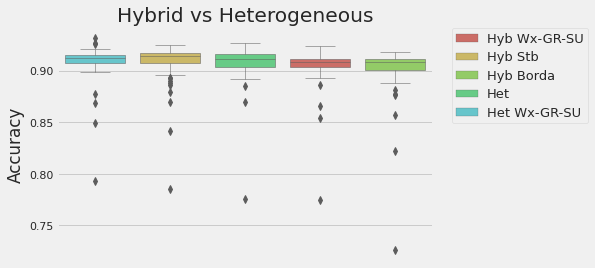

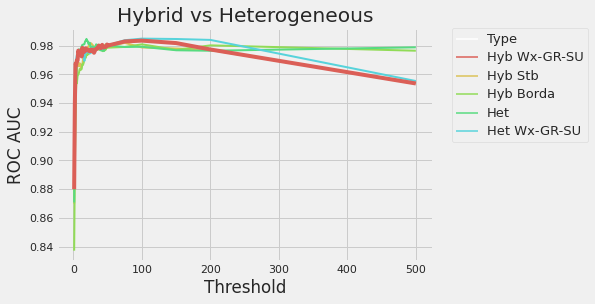

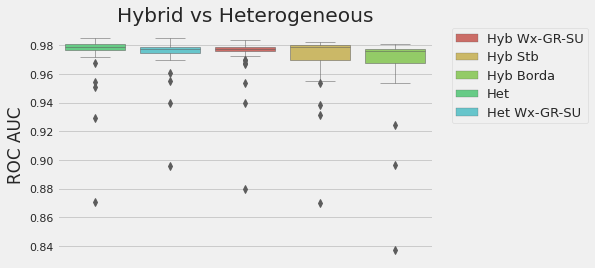

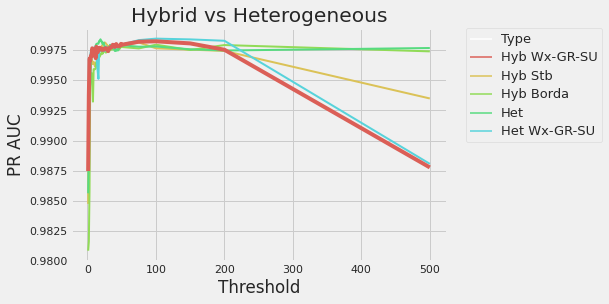

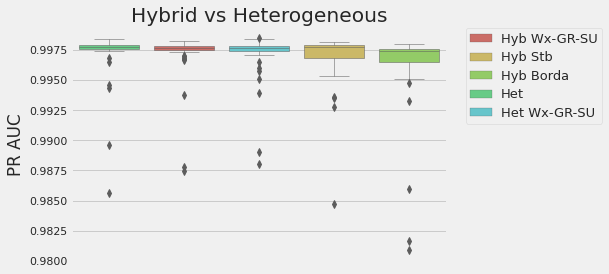

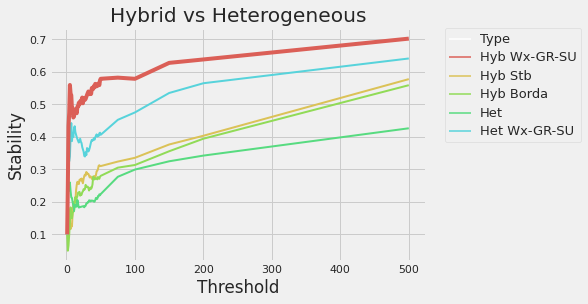

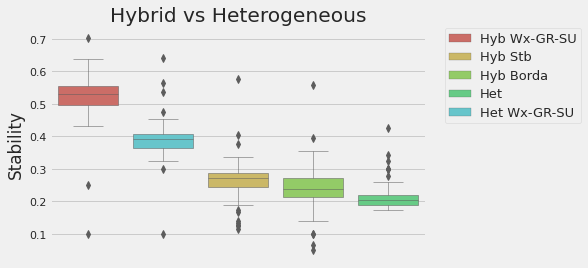

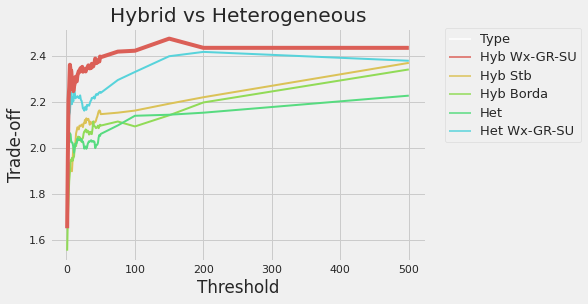

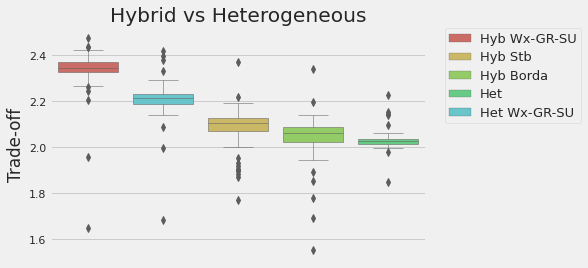

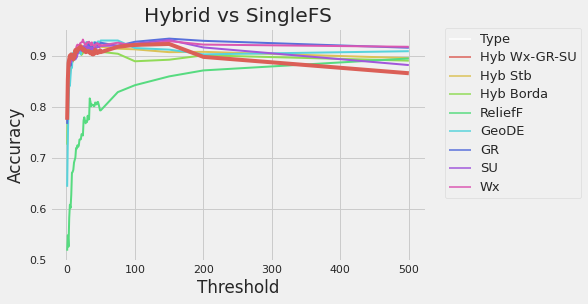

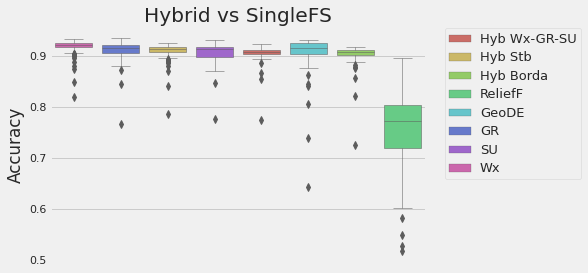

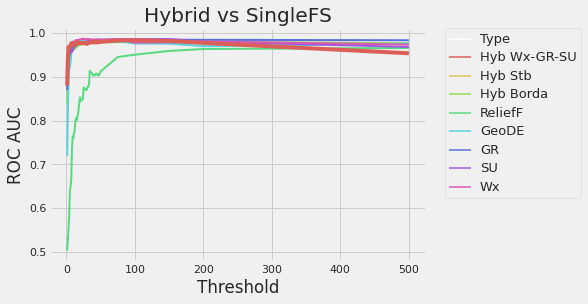

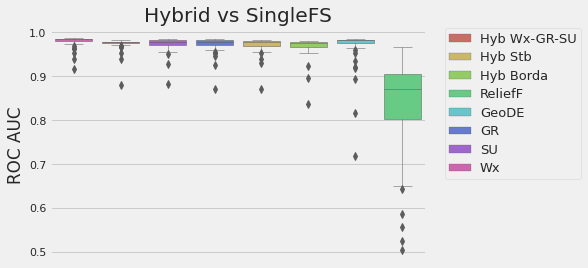

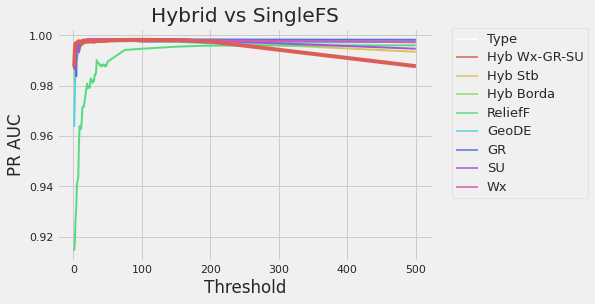

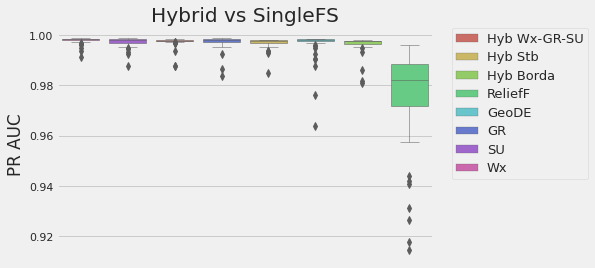

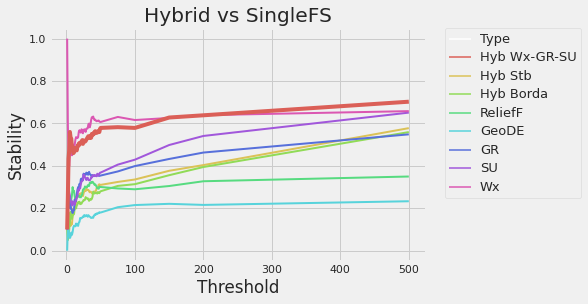

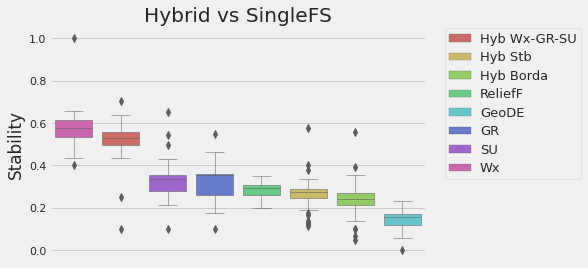

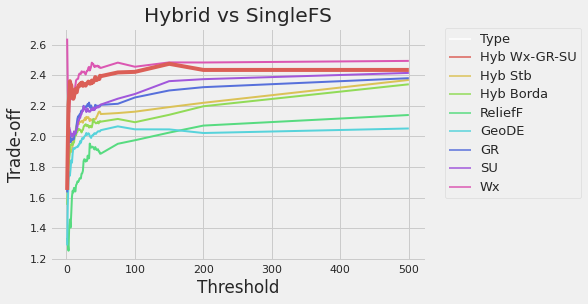

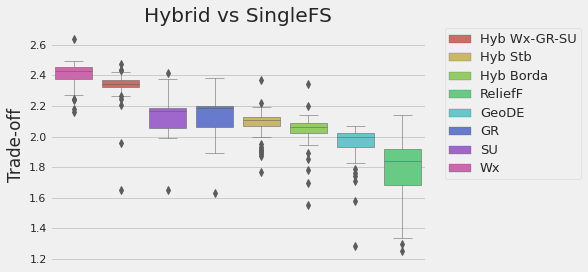

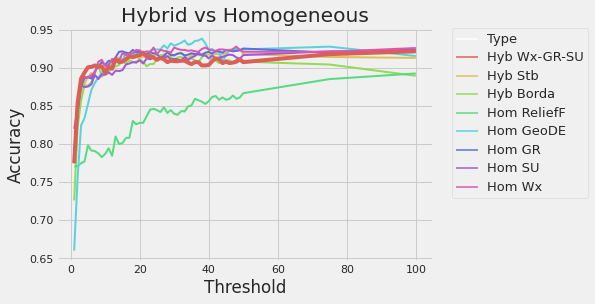

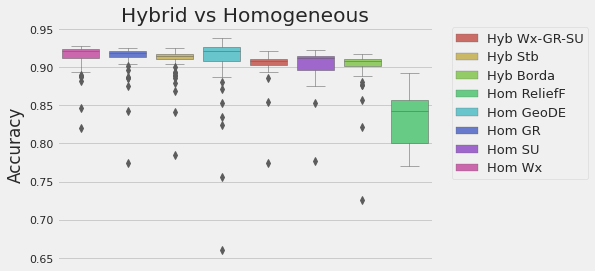

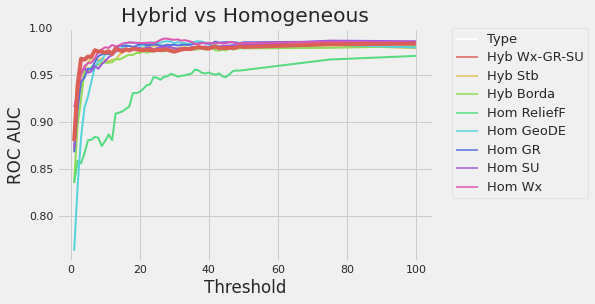

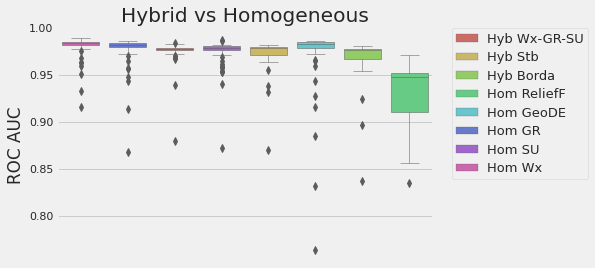

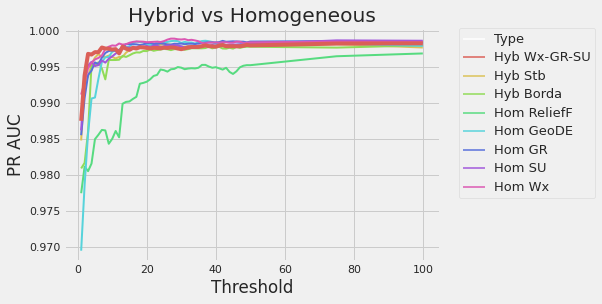

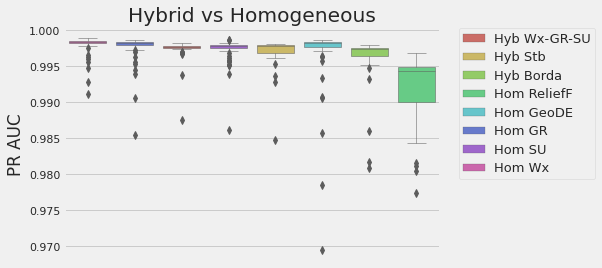

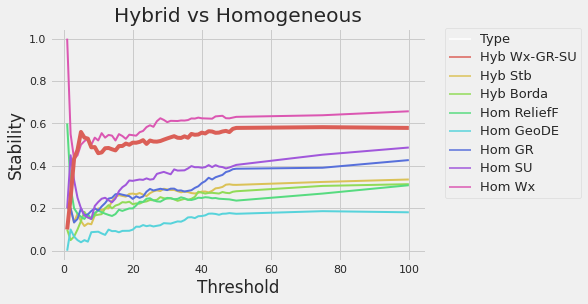

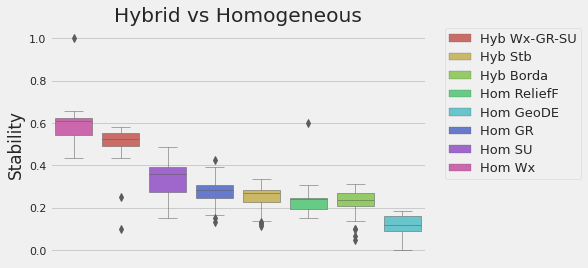

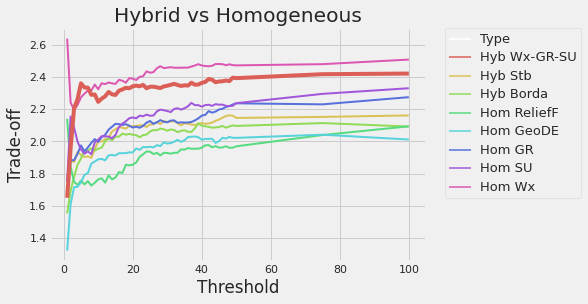

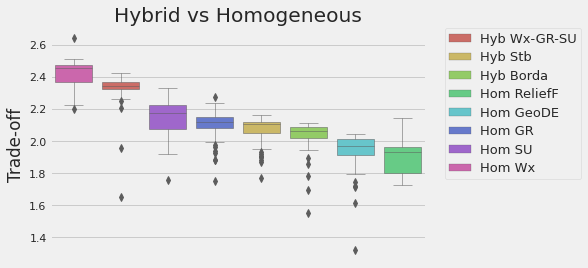

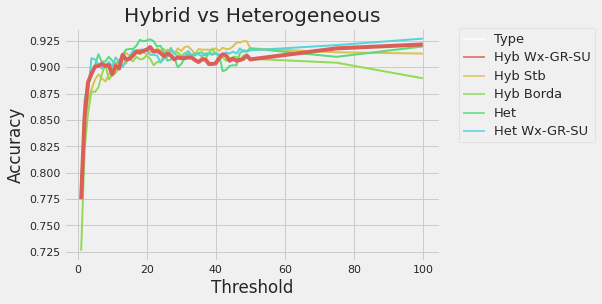

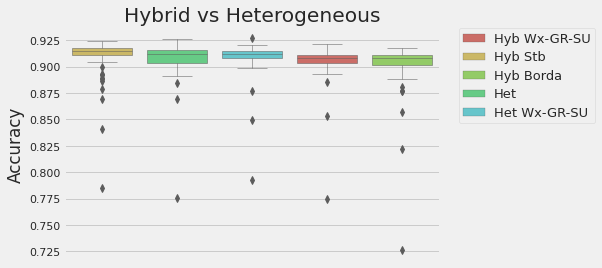

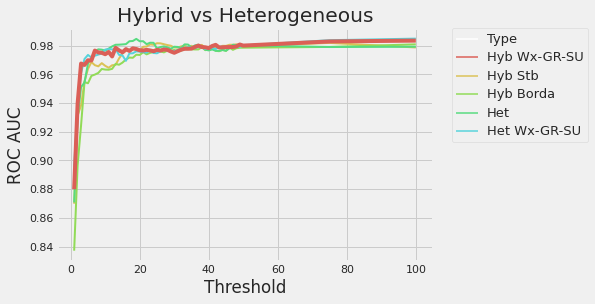

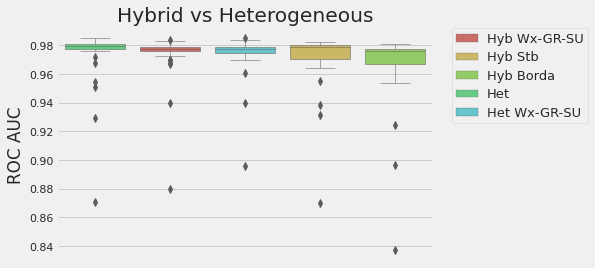

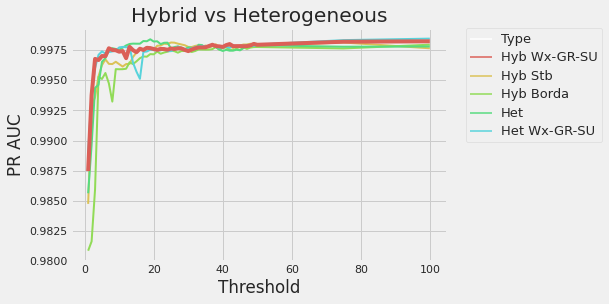

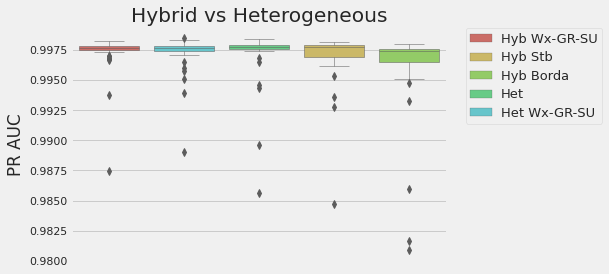

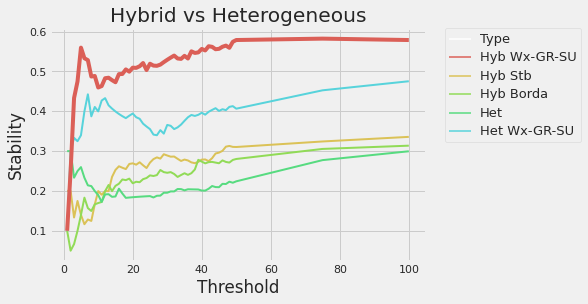

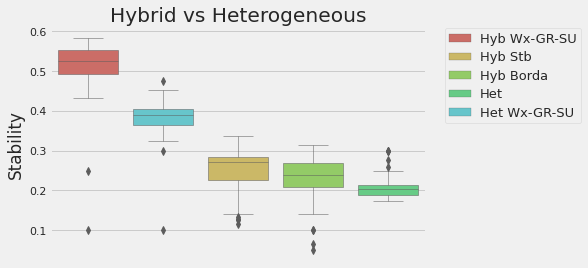

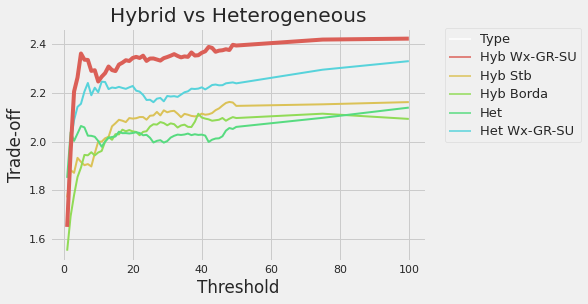

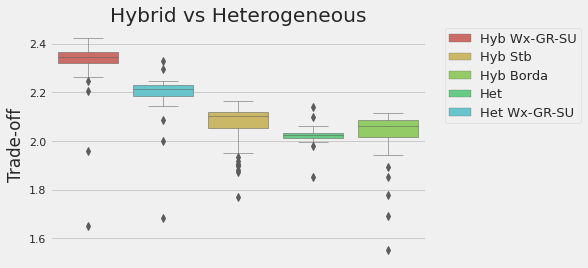

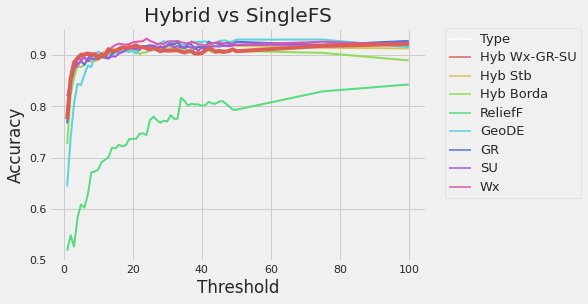

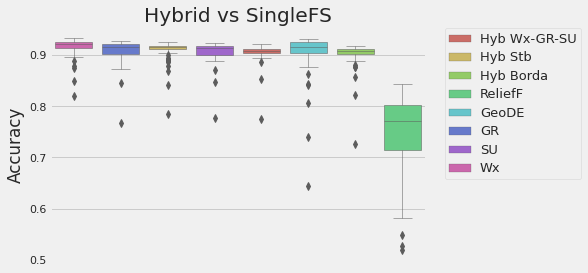

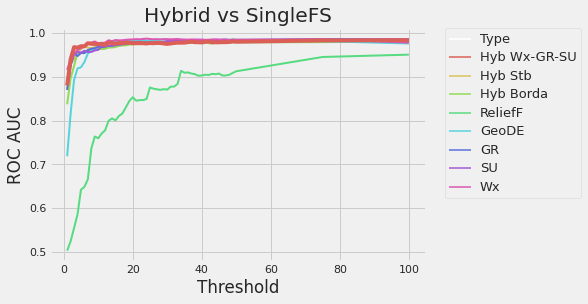

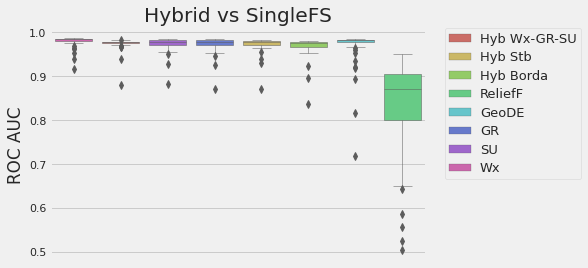

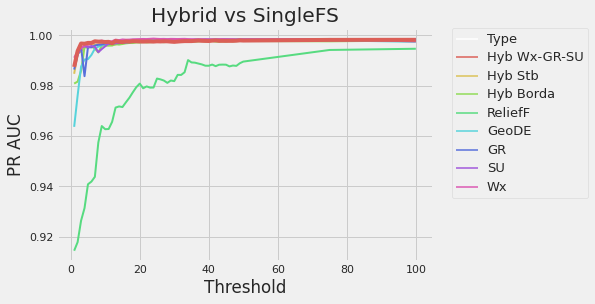

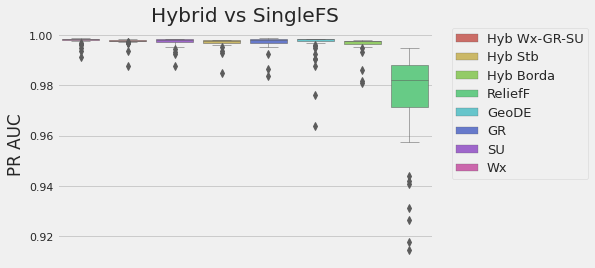

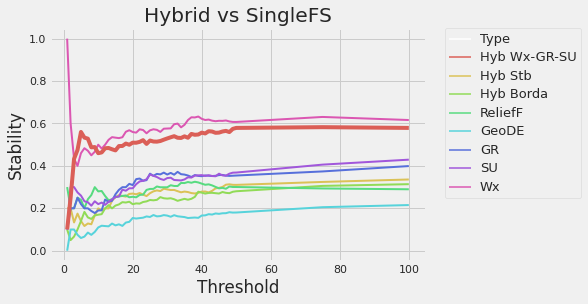

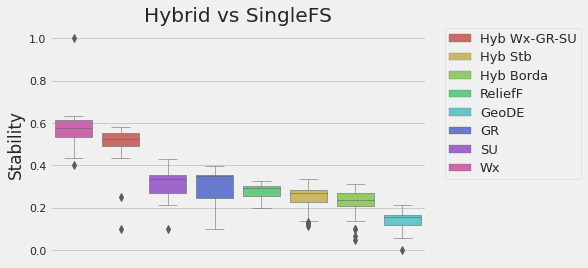

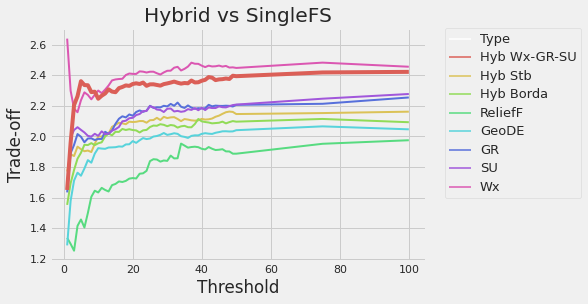

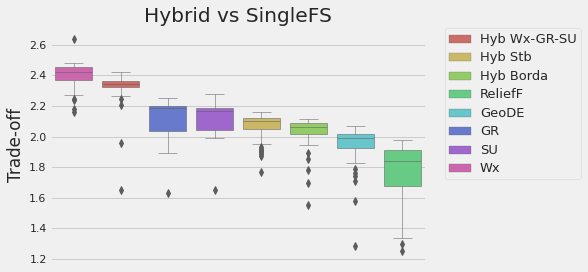

<Figure size 432x288 with 0 Axes>

In [8]:
path = "/home/colombelli/Documents/arrayexpress/lung/"
thresholds_list = ["1_500", "1_100"]
for thresholds in thresholds_list:    
    concat_df = load_results(path)
    plot_results_vs(["hy_hom", "hy_het", "hy_sin"])

## Pancreas

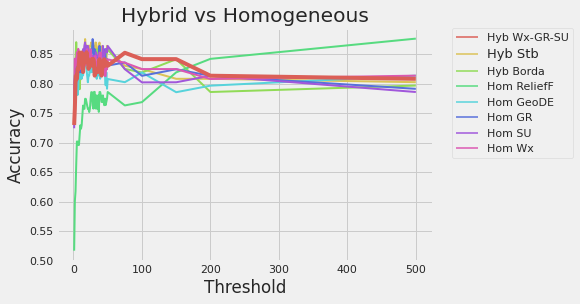

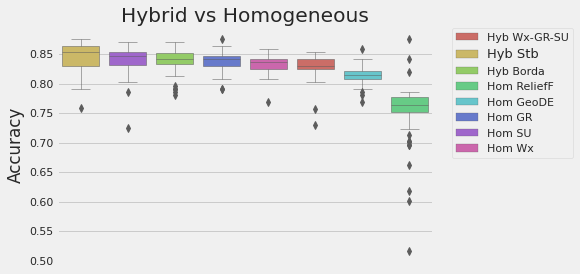

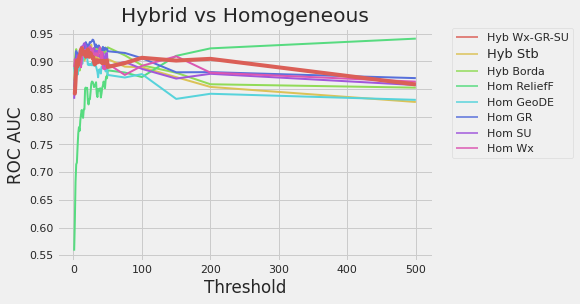

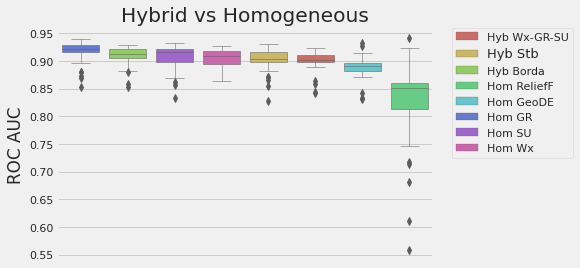

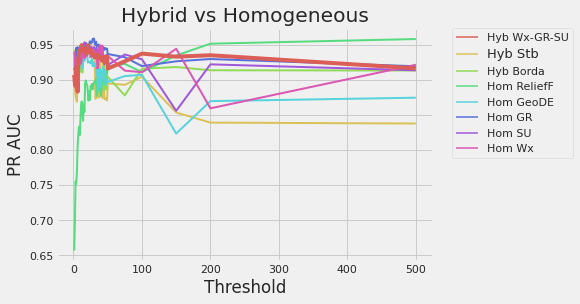

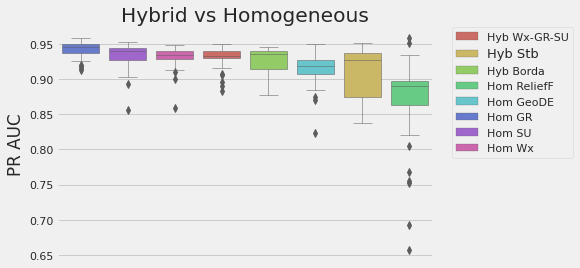

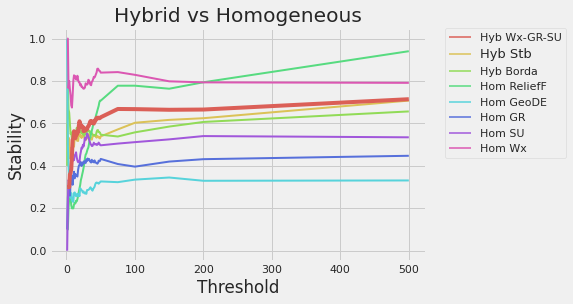

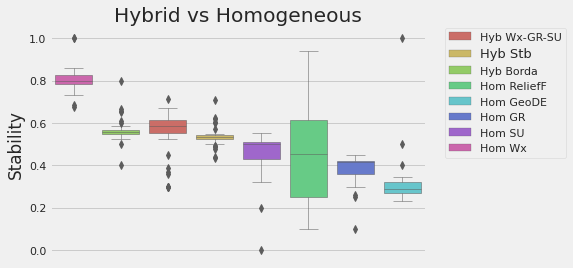

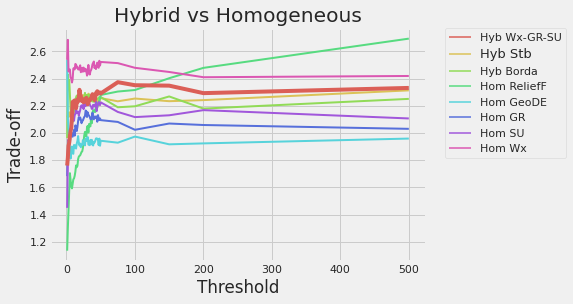

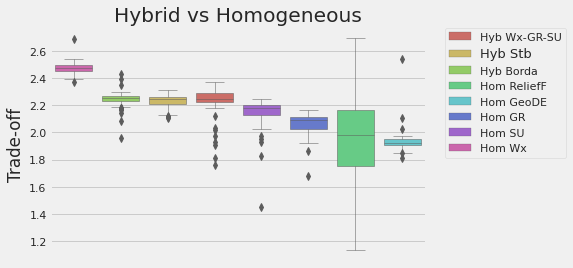

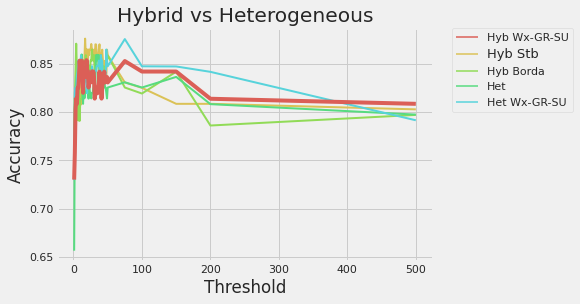

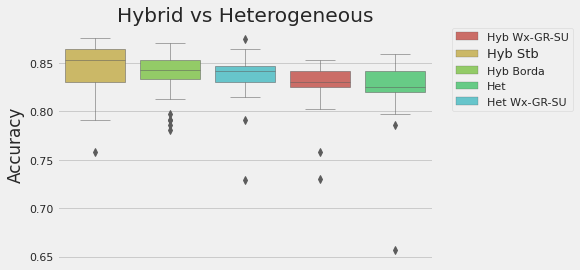

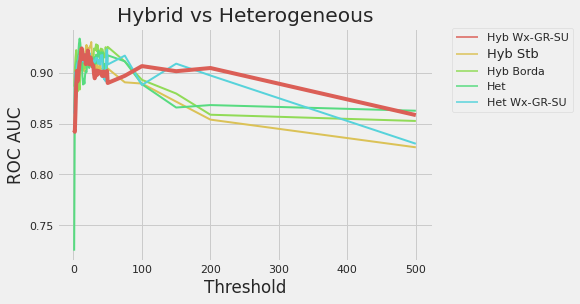

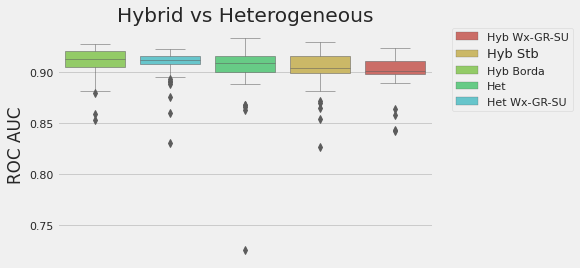

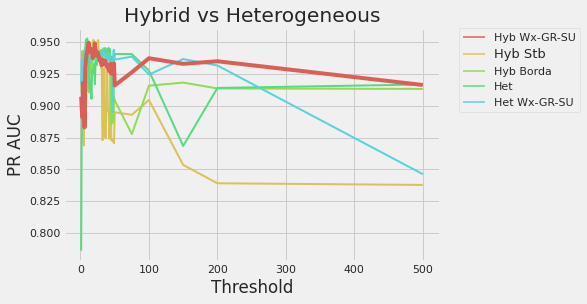

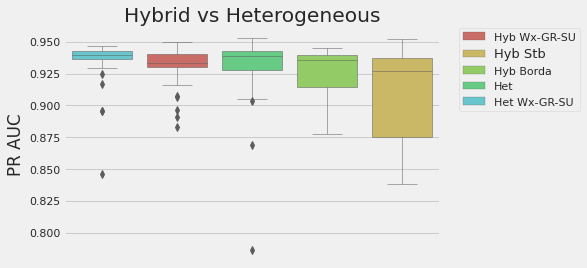

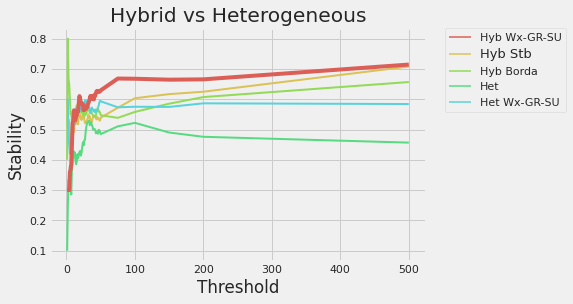

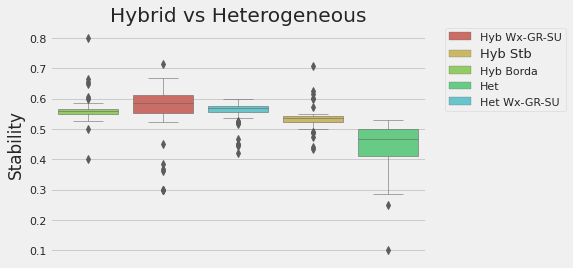

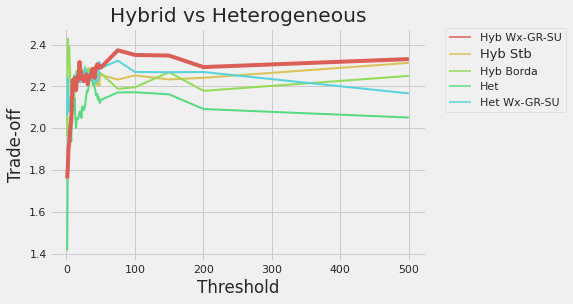

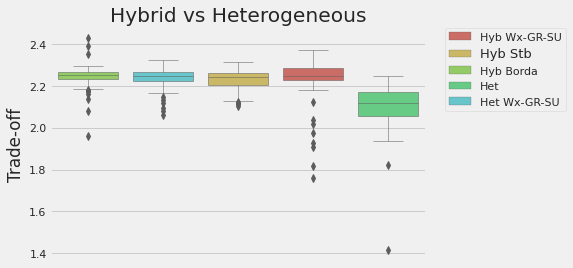

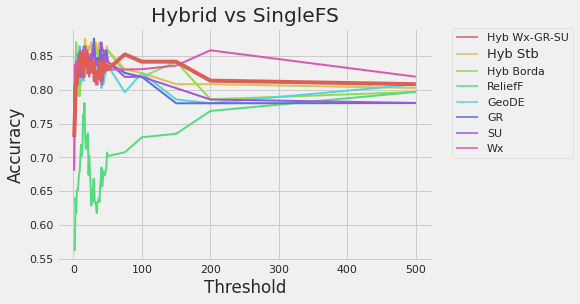

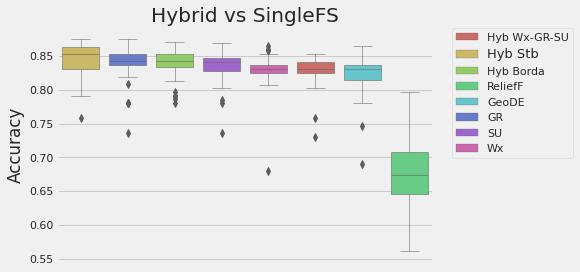

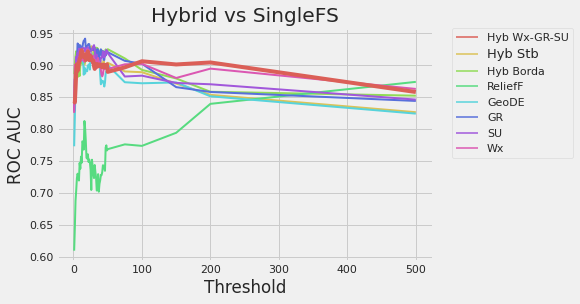

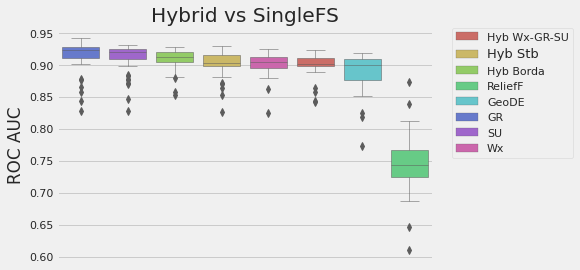

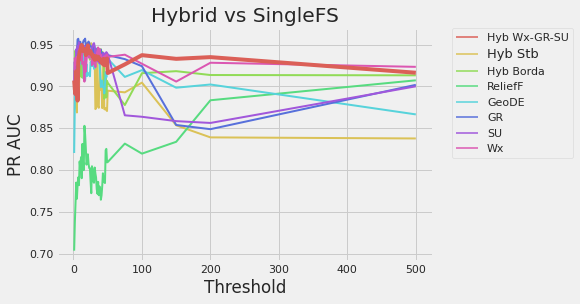

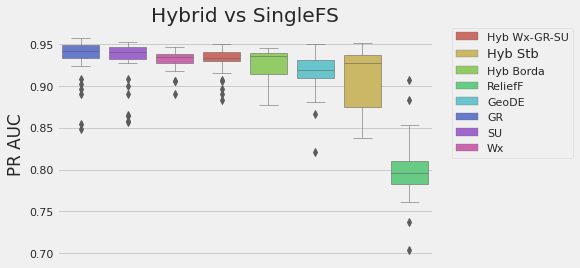

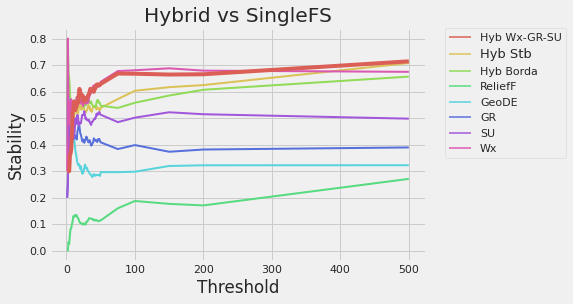

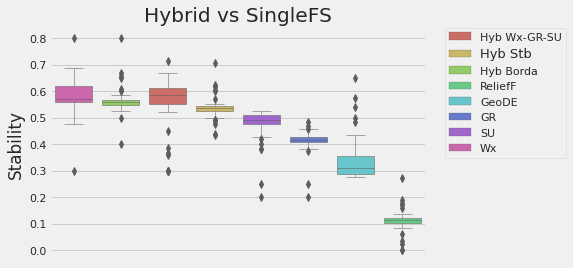

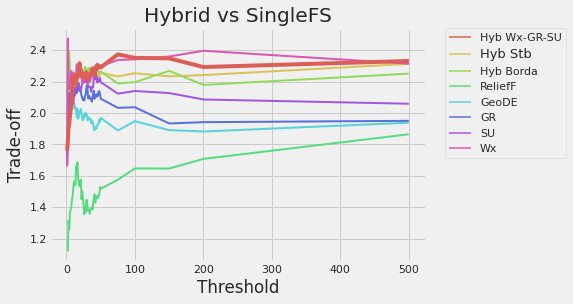

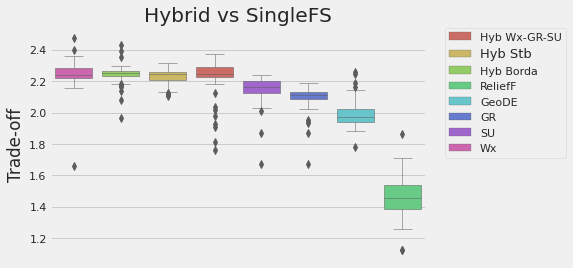

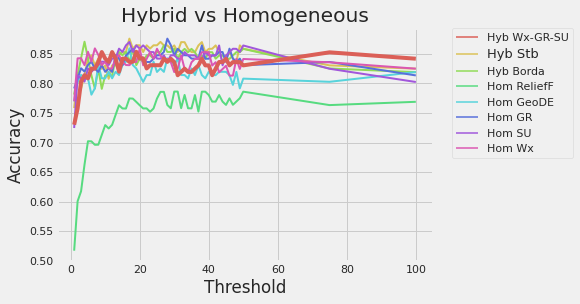

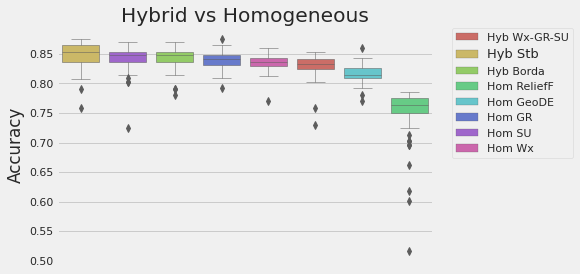

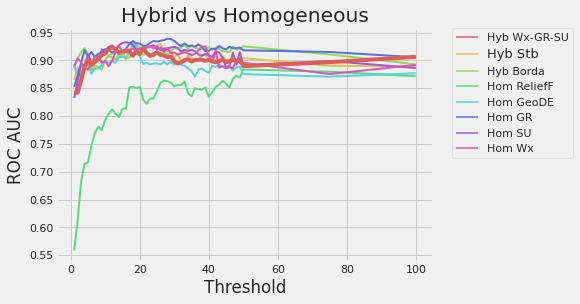

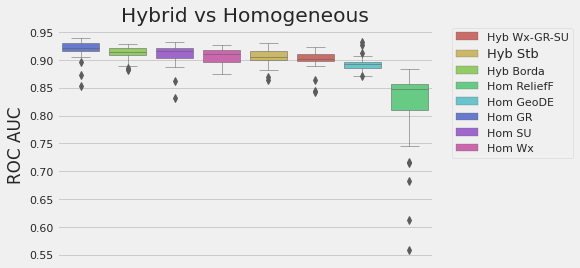

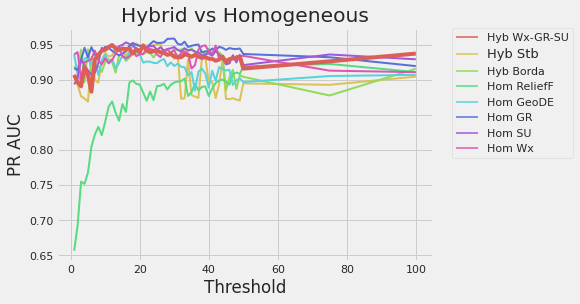

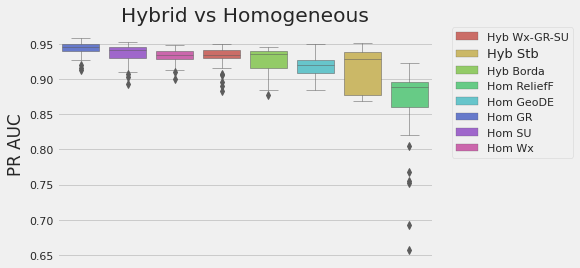

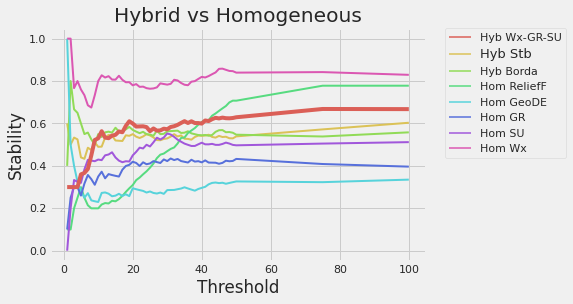

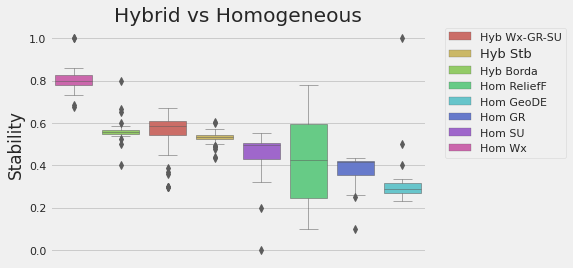

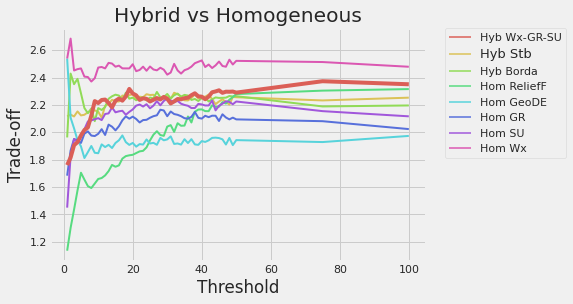

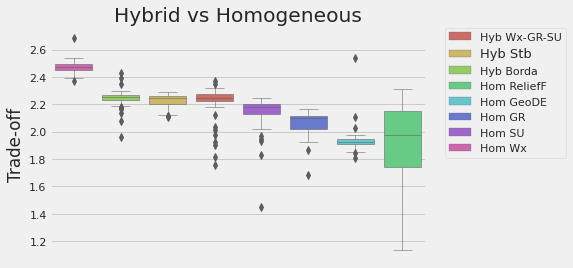

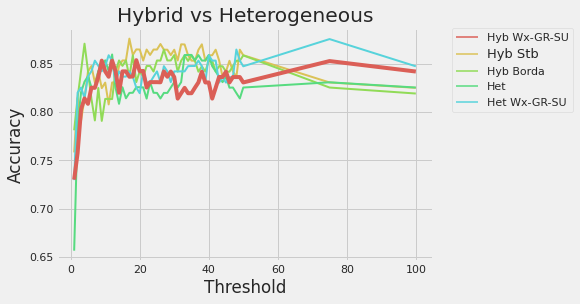

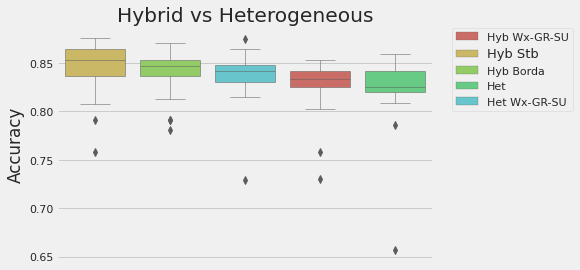

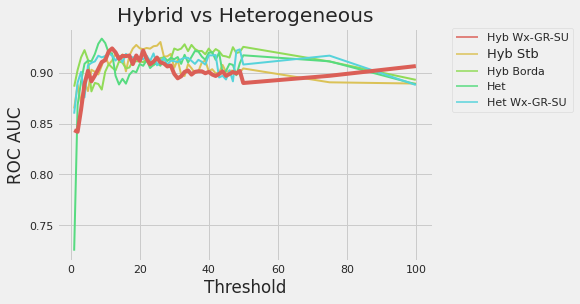

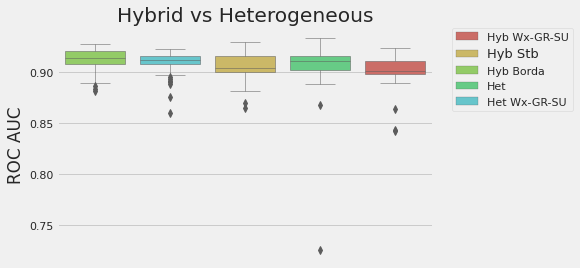

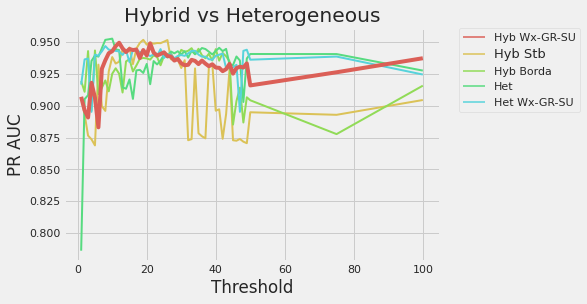

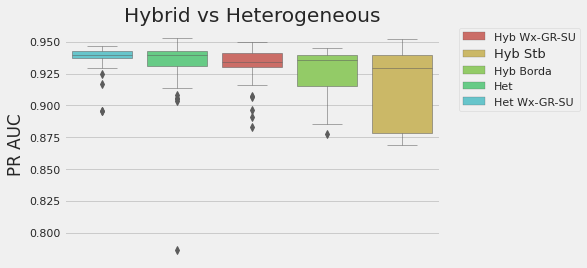

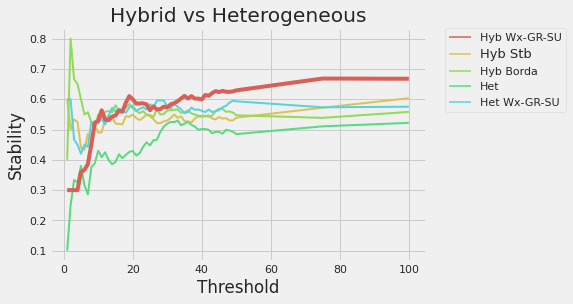

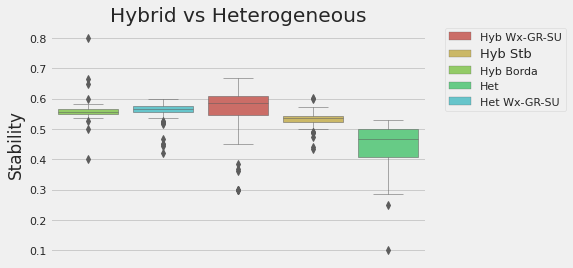

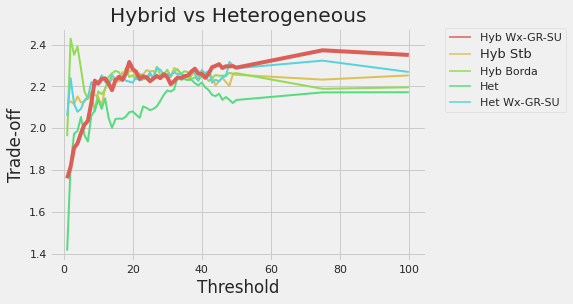

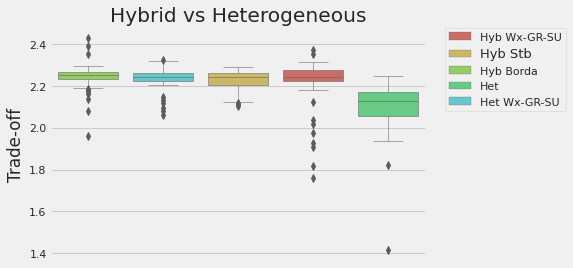

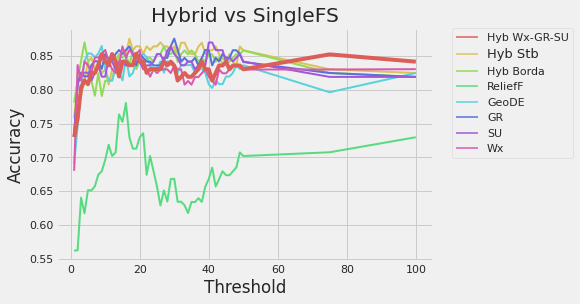

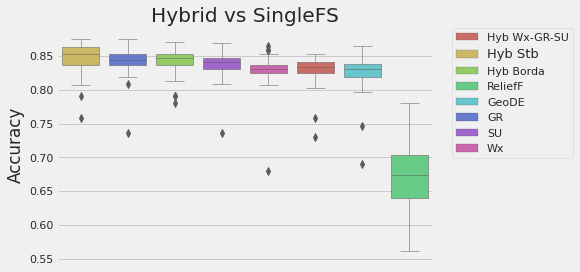

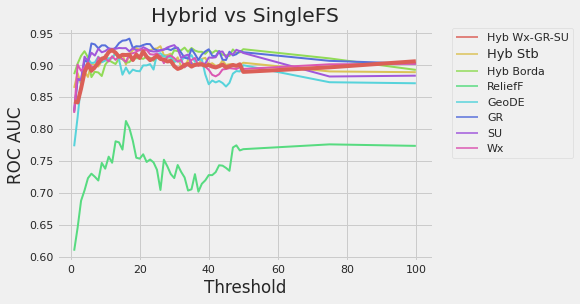

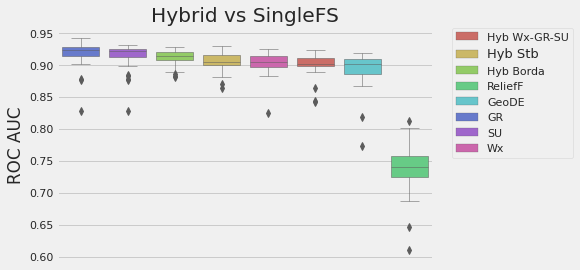

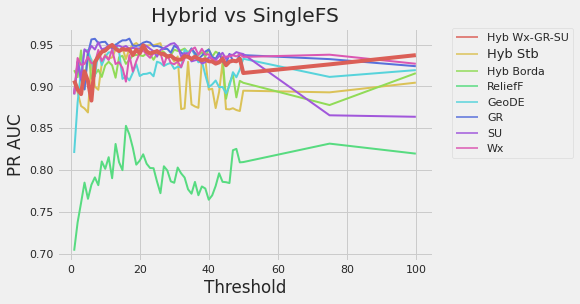

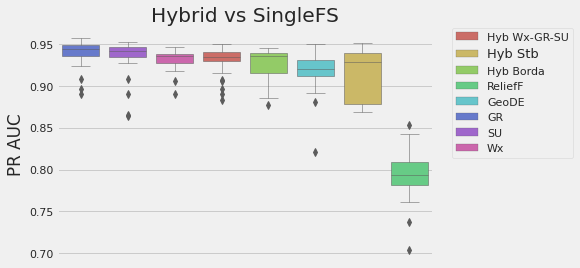

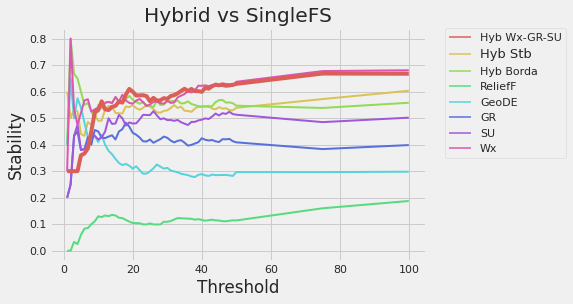

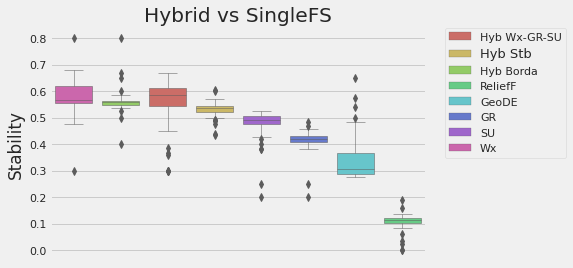

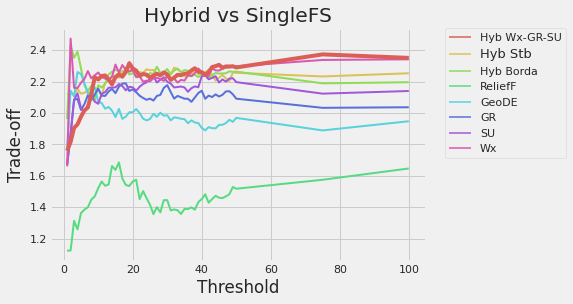

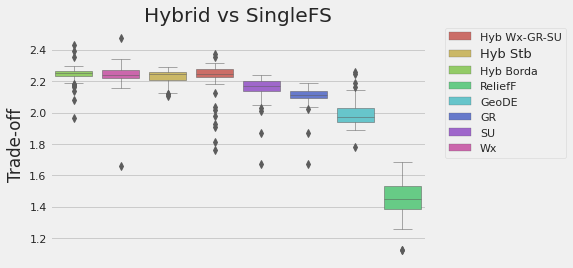

<Figure size 432x288 with 0 Axes>

In [7]:
path = "/home/colombelli/Documents/arrayexpress/pancreas/"
thresholds_list = ["1_500", "1_100"]
for thresholds in thresholds_list:    
    concat_df = load_results(path)
    plot_results_vs(["hy_hom", "hy_het", "hy_sin"])